## Computational Calculus Series

# Part 7: The anatomy of a hyperplane

In this post we describe important characteristics of the *hyperplane* including the concept of the *direction of steepest ascent*.  These concepts are fundamental to the notion of mult-input derivatives (the gradient), gradient descent, as well as linear regression and classification schemes.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as callib
import numpy as np

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1.   Building hyperplanes from simple pieces

In this Section we describe how to construct complex hyperplanes from relatively simple parts.  Along the way we will also see several important concepts - most notably the idea of the *direction of steepest ascent* arisess naturally from the notion of slope.

## 1.1  Single input hyperplanes 

The formula for a line 

\begin{equation}
g(w) = a + bw
\end{equation}

tells us - for specific choices of $a$ and $b$ - are the point at which it strikes or intersects the vertical axis (given by $a$) and the steepness or *slope* of that line (given by the coeffecient $b$).  We illustrate two simple examples of a line in the next Python cell.

<IPython.core.display.Javascript object>


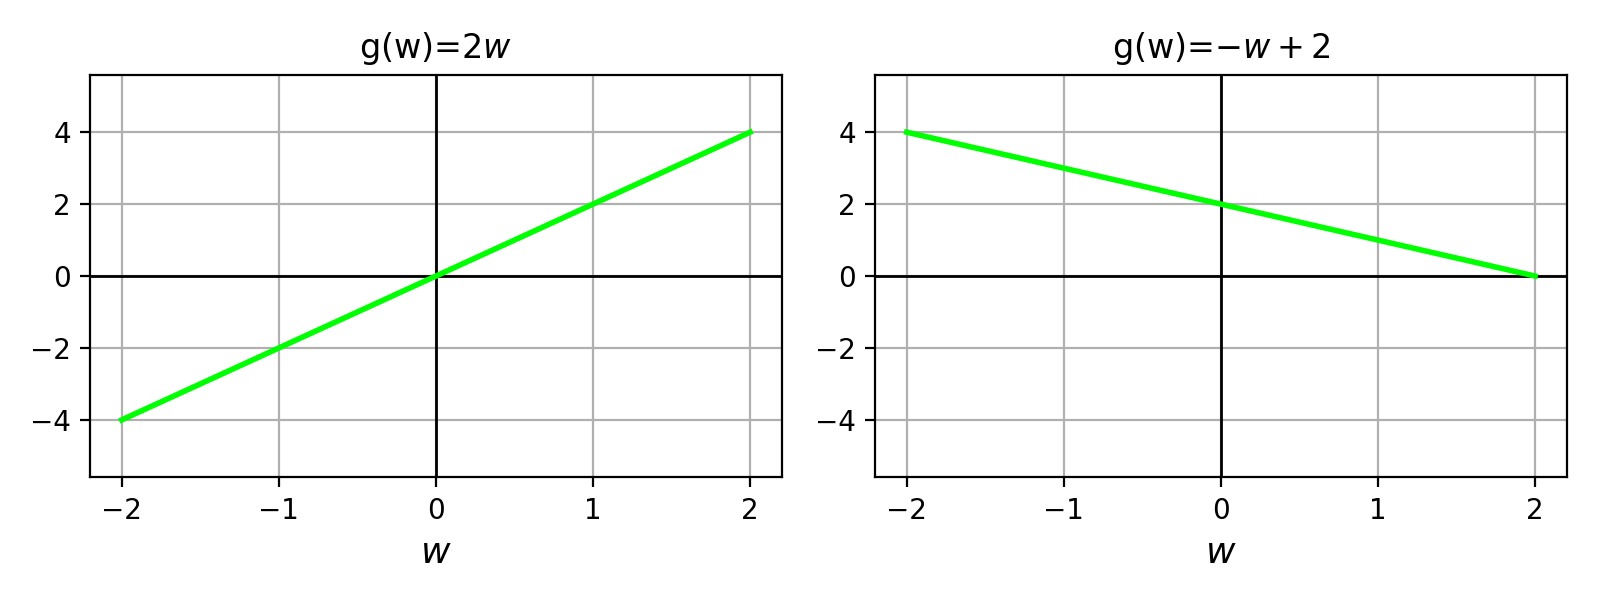

In [3]:
# create two quadratic functions
func1 = lambda w: 2*w
func2 = lambda w: -w + 2

# use custom plotter to show both functions
title1 = '$g(w)=$2w$'; title2 = '$g(w)=$-w+2$';
callib.plotter.double_2d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 13,color = 'lime')

We can visualize the slope of a single line using a horizontal vector with magnitude $b$, which we show in the animation below in black.  As a direction the slope is often referred to as the *direction of steepest ascent* - since it tells us the direction we must travel on the line to increase its value the fastest.  This vector provides a simple visualization of a) the direction in which the line is increasing and b) how quickly it is increasing in this direction.  Notice how that - by the same logic - the value $-b$ provides the direction of steepest *descent* on the line.  We also show this direction as a red vector in the animation.


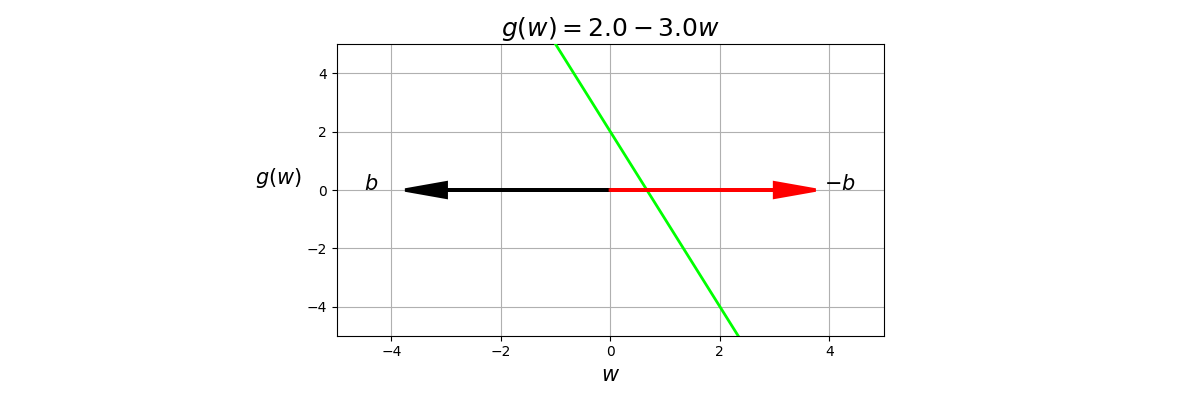
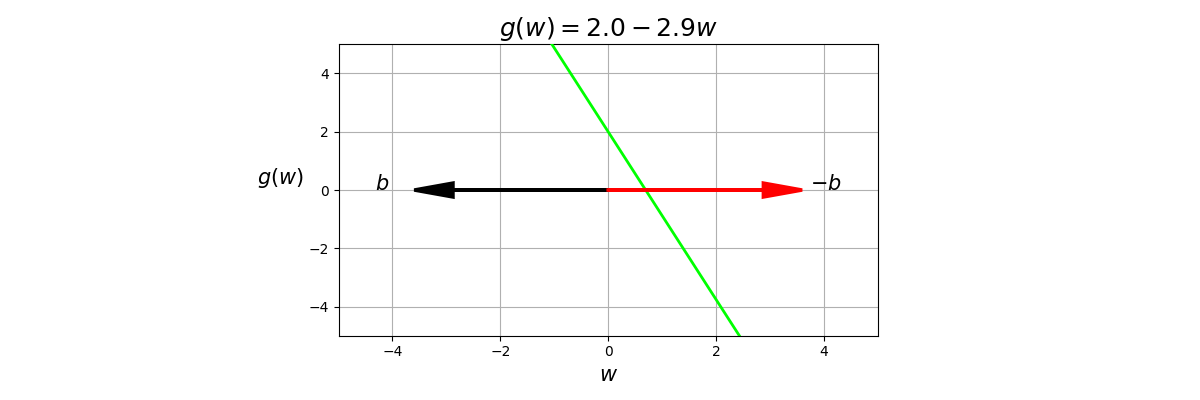
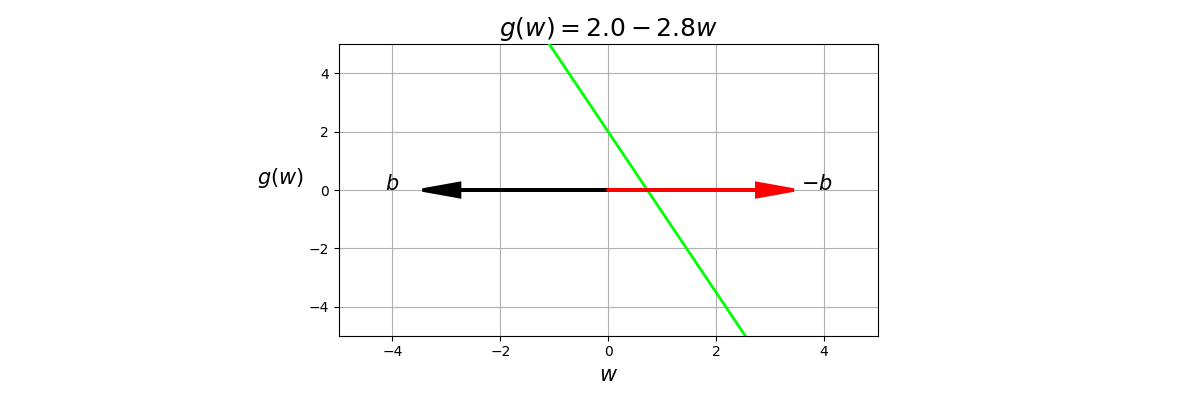
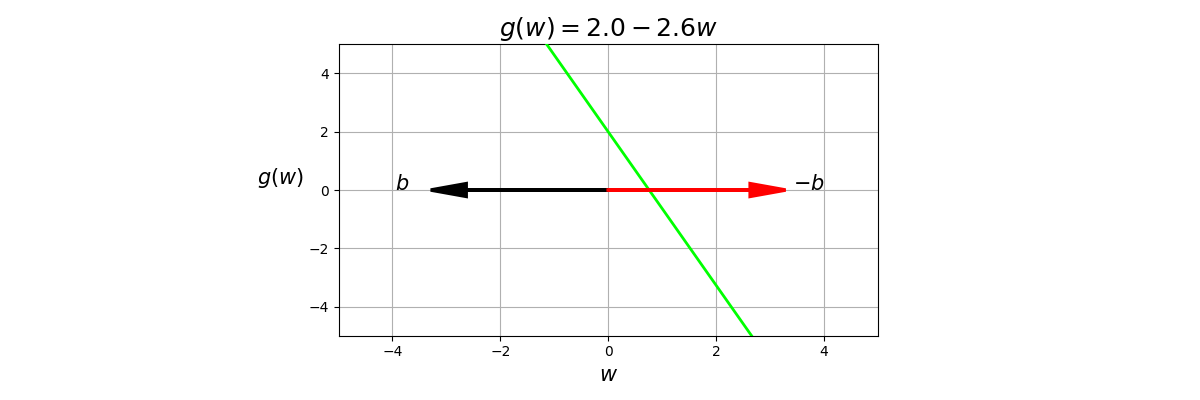
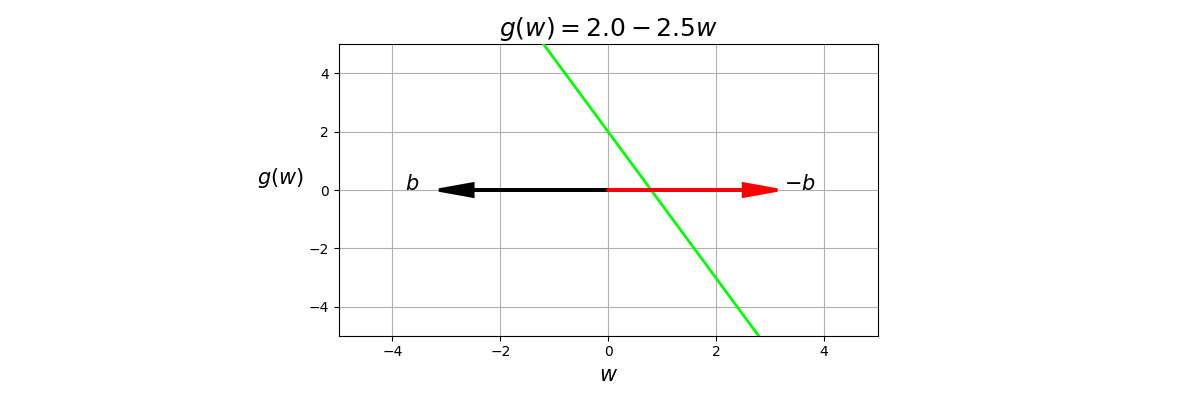
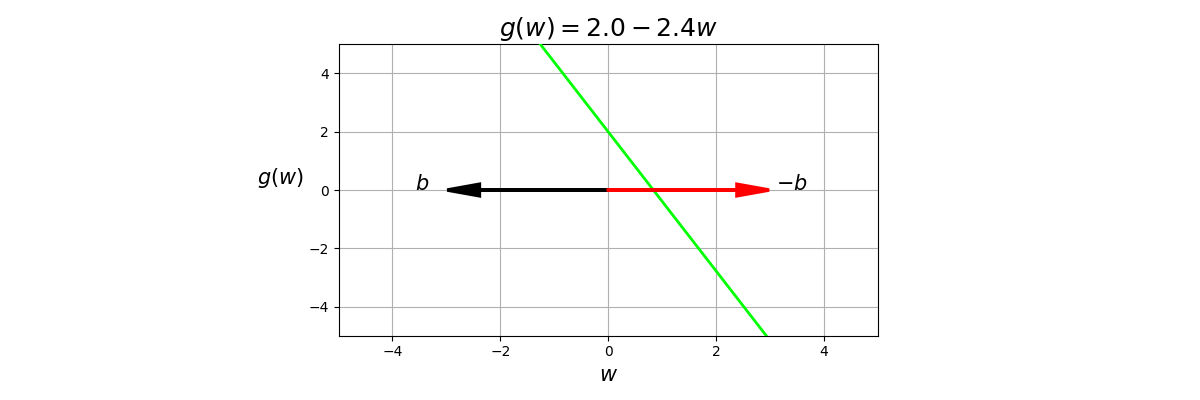
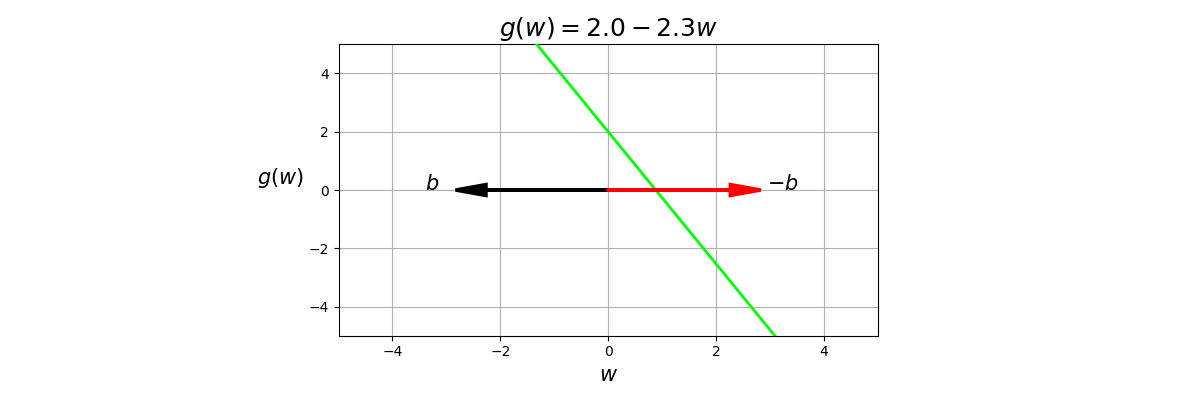
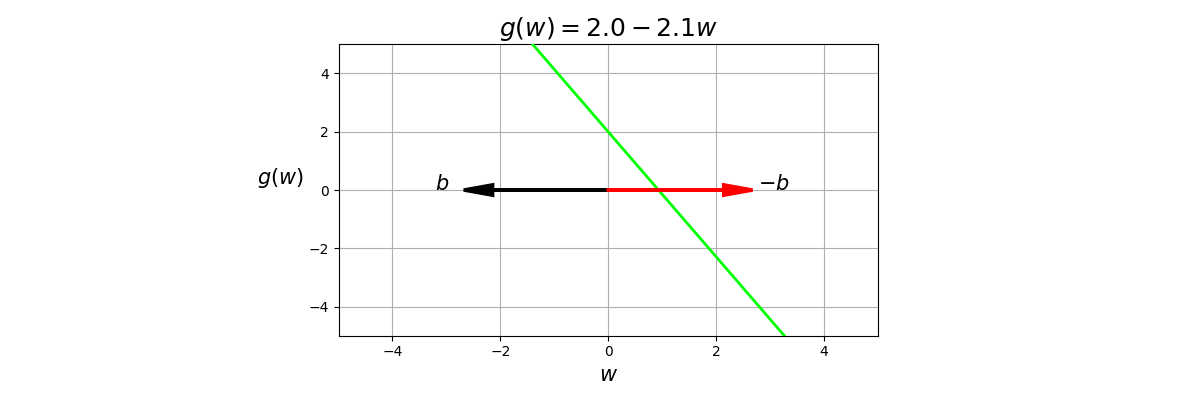
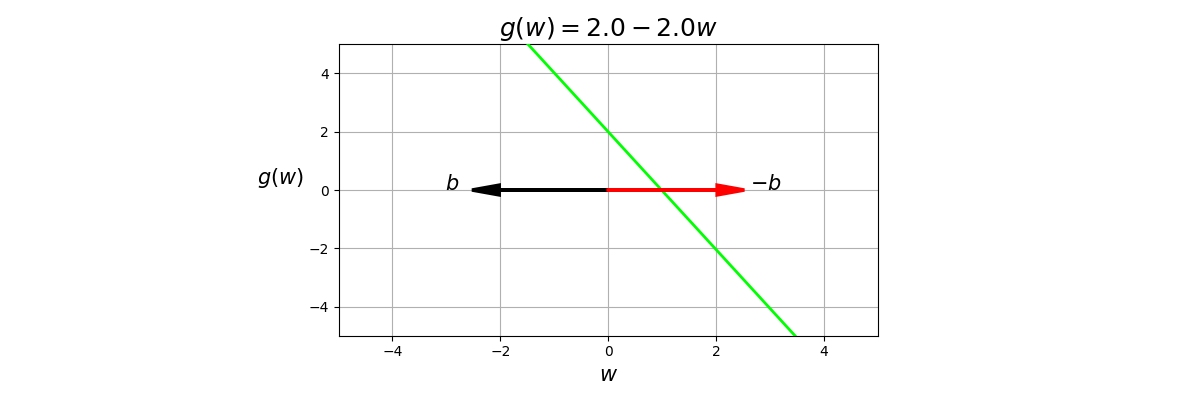
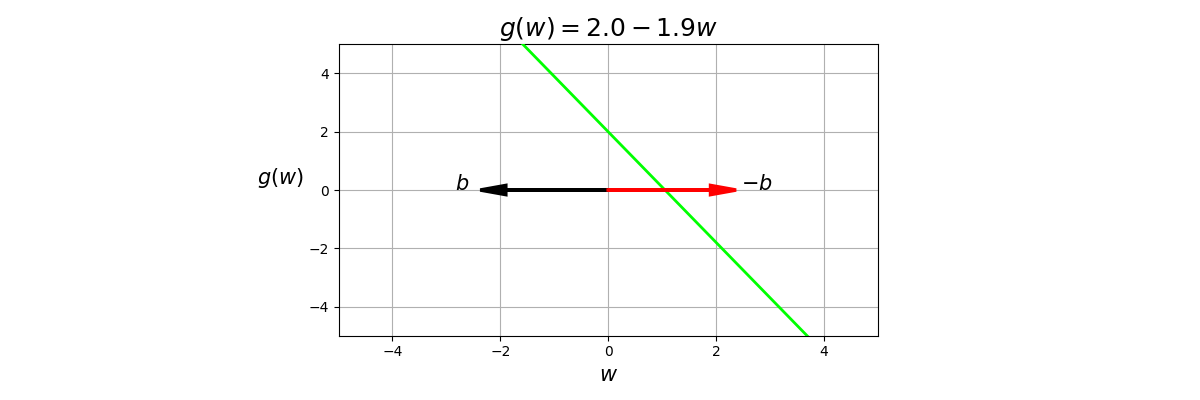
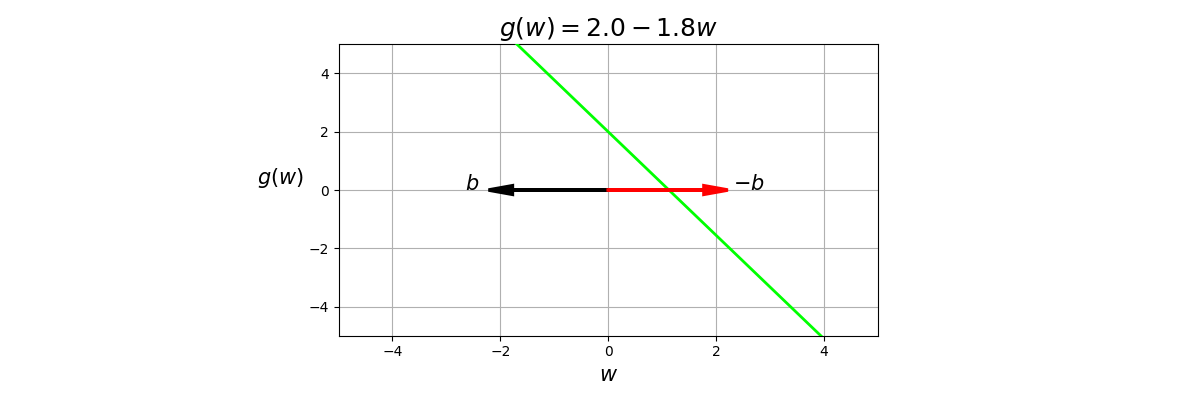
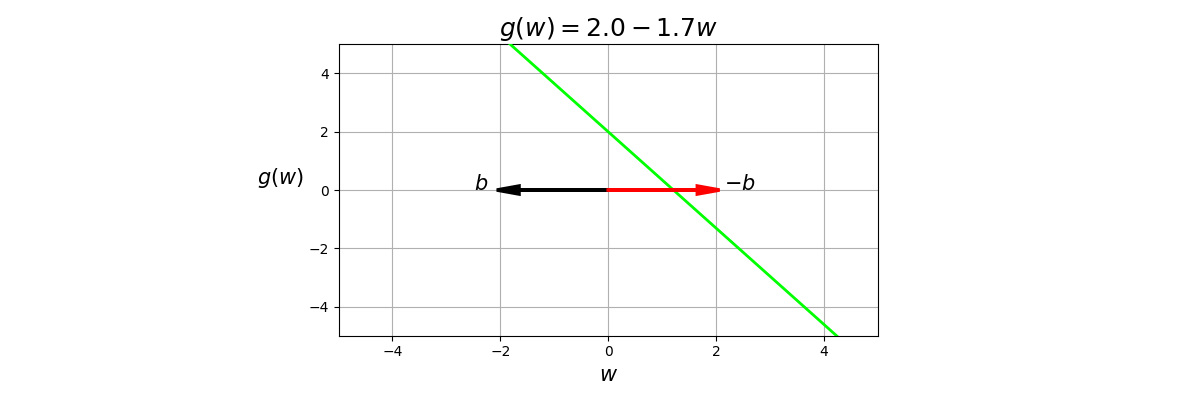
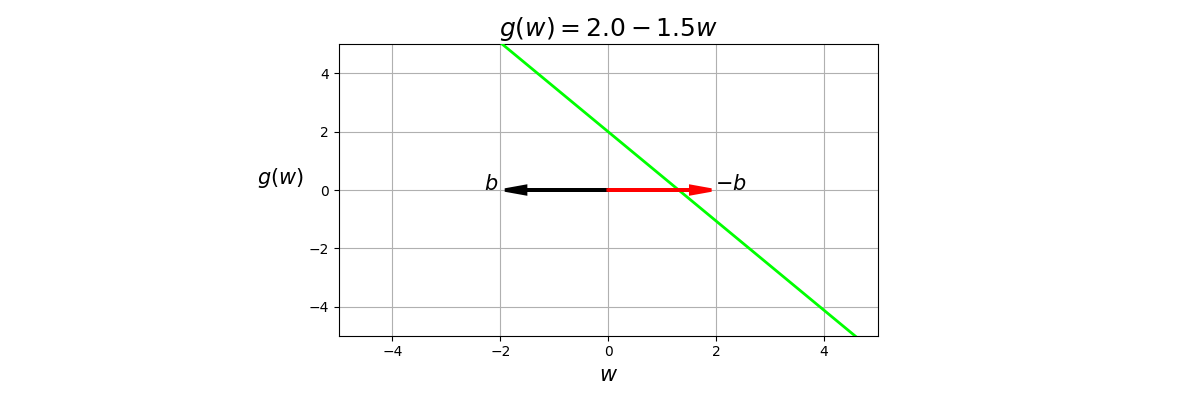
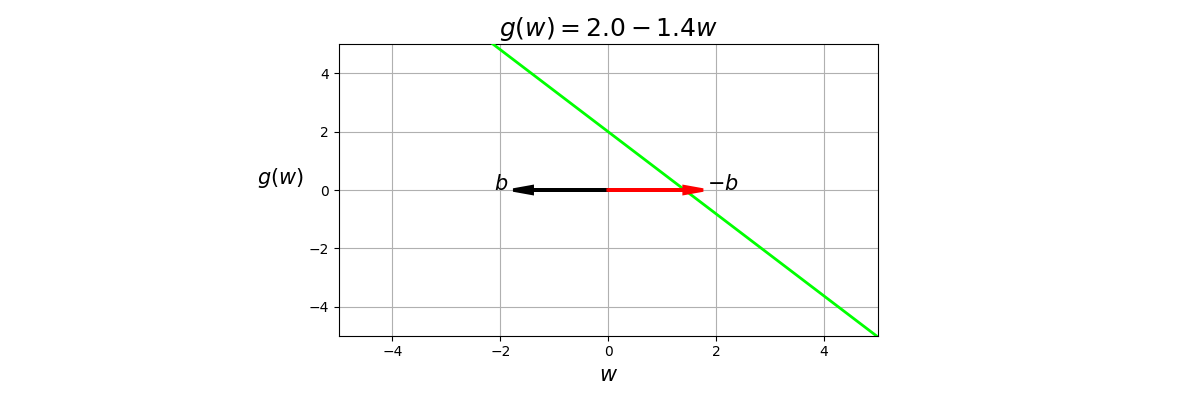
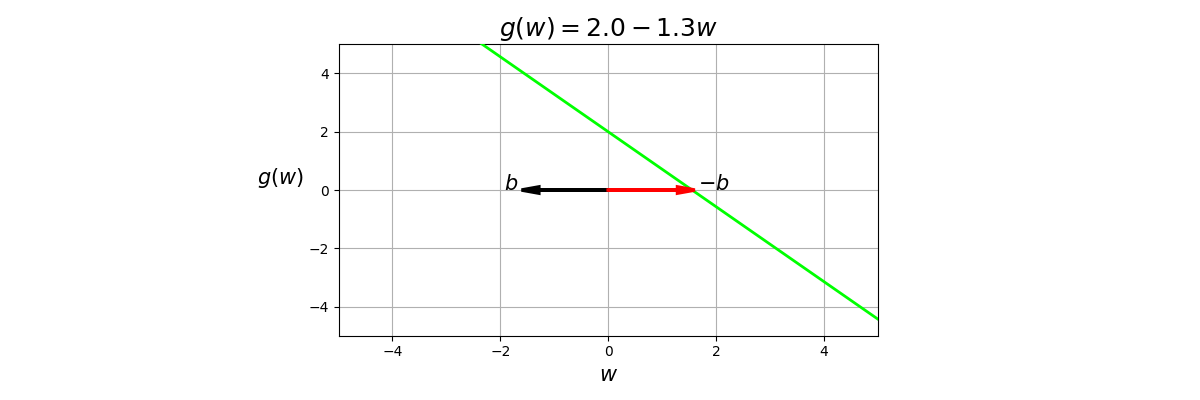
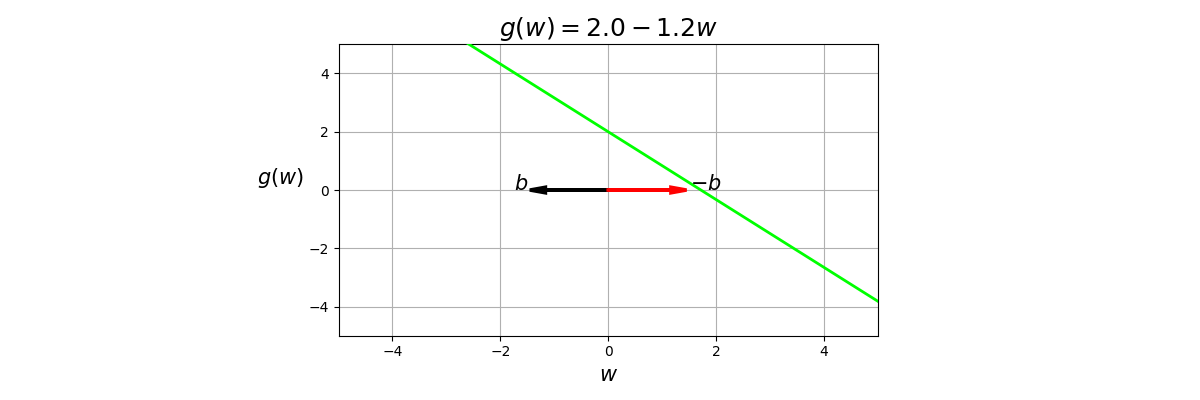
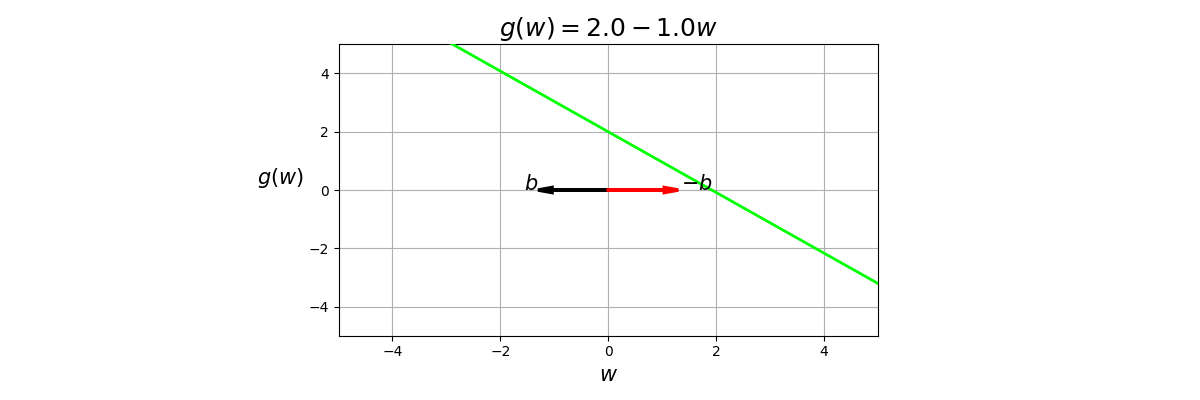
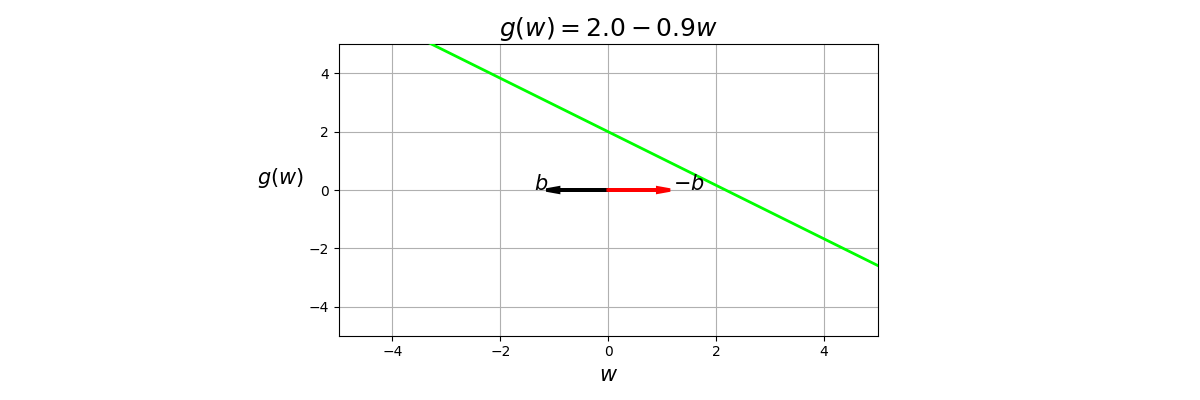
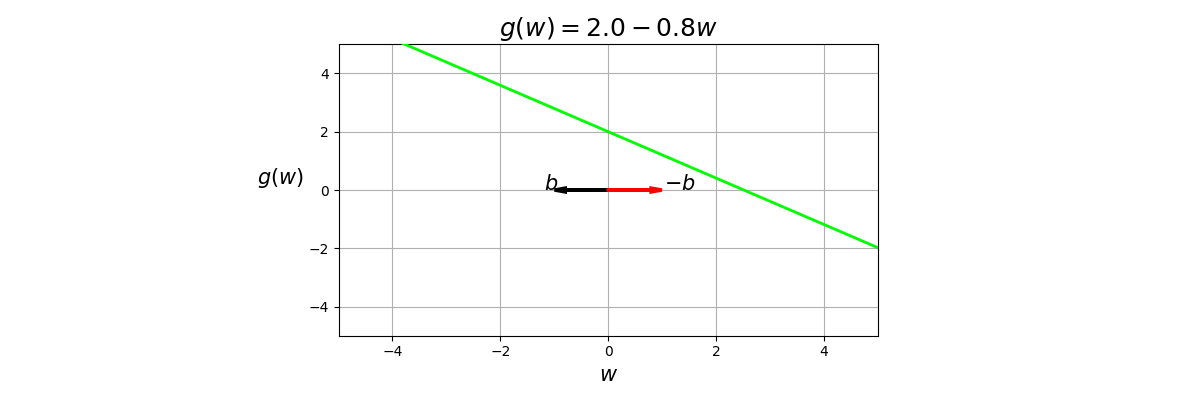
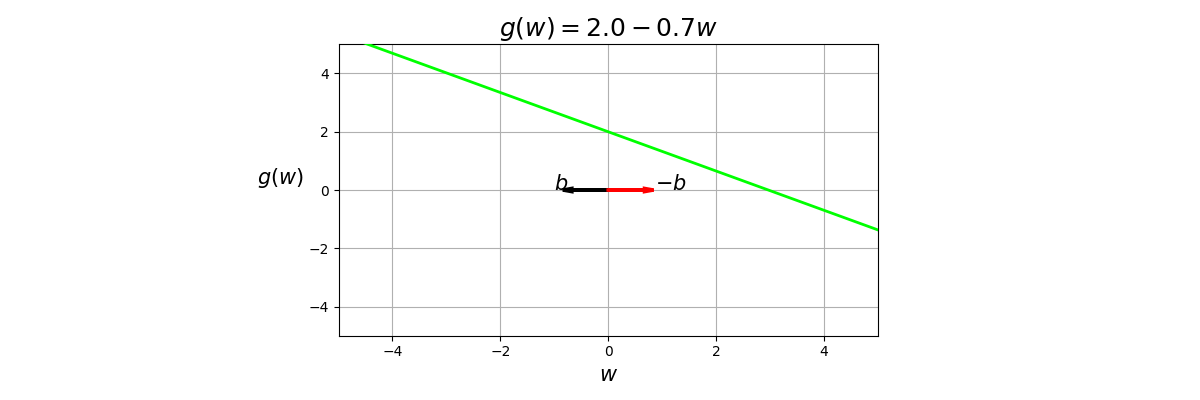
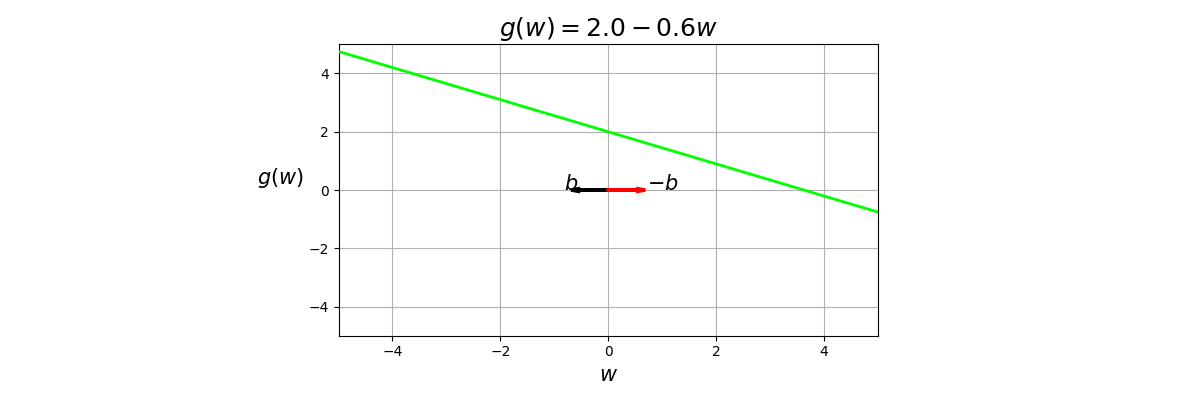
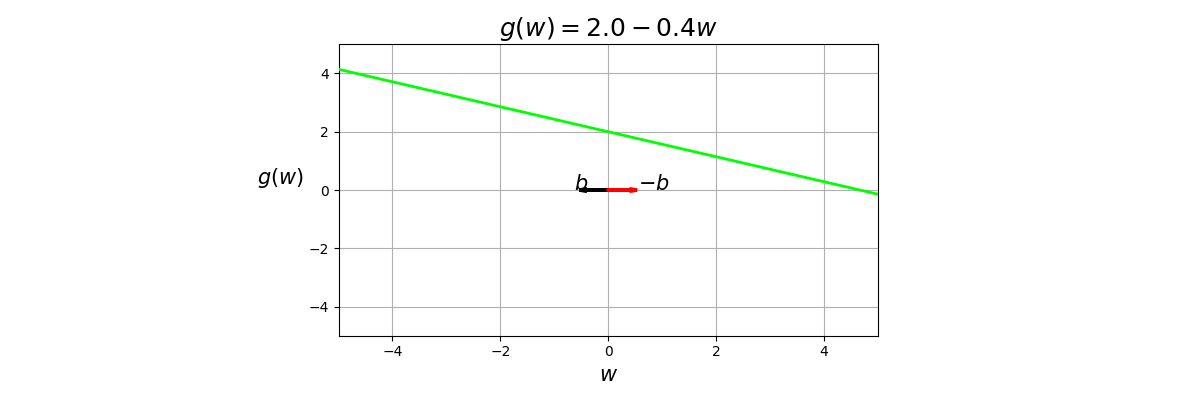
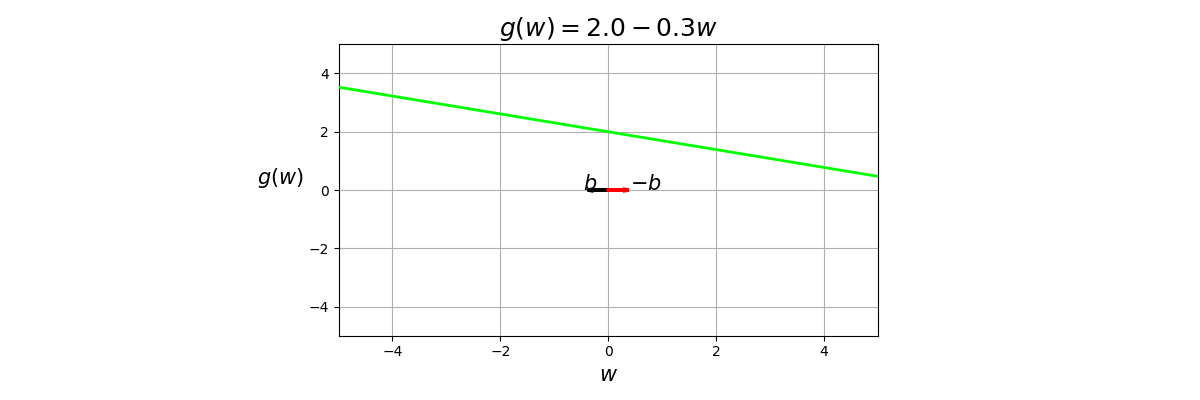
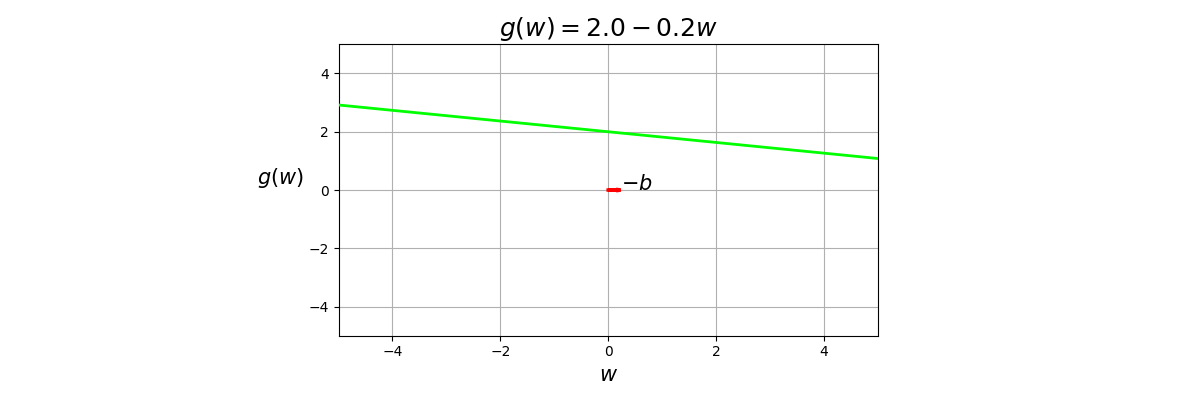
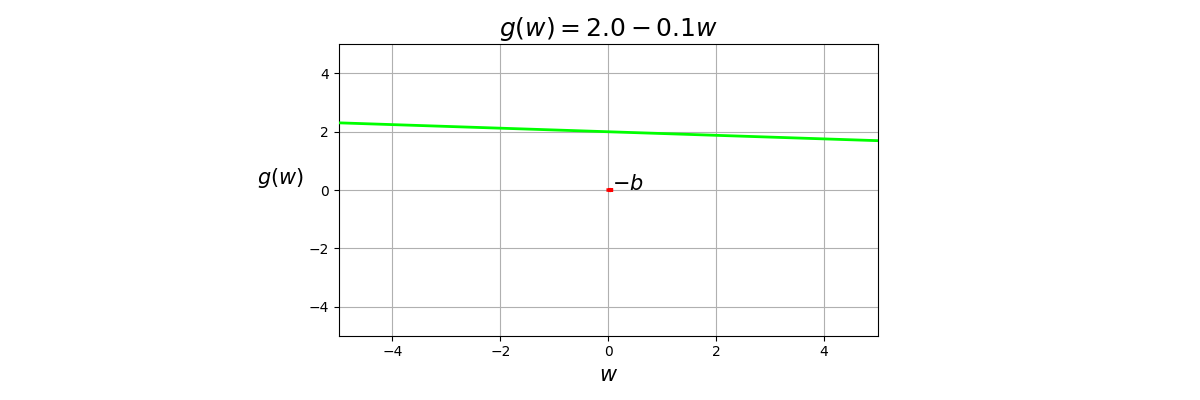
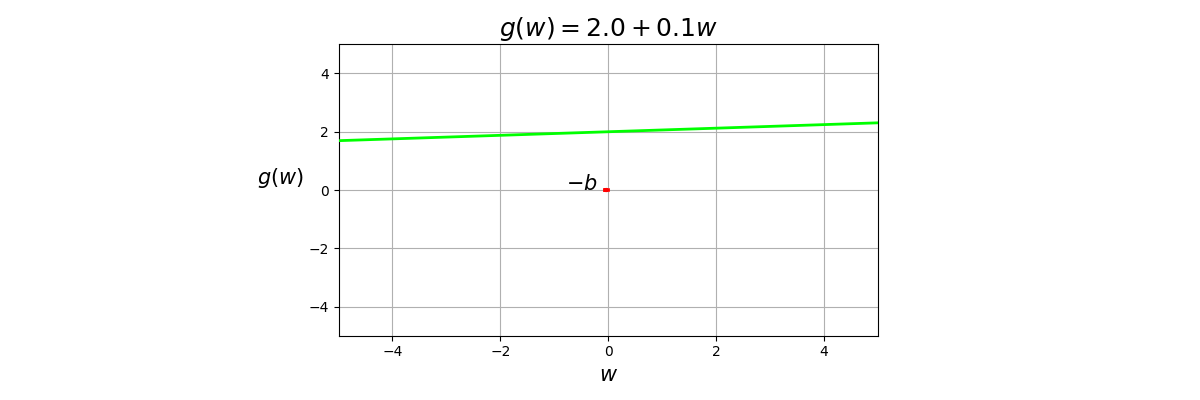
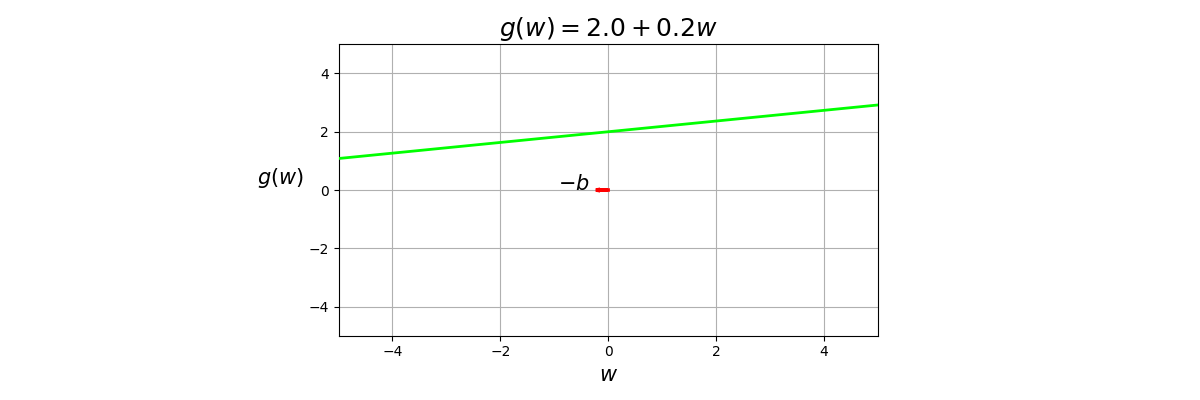
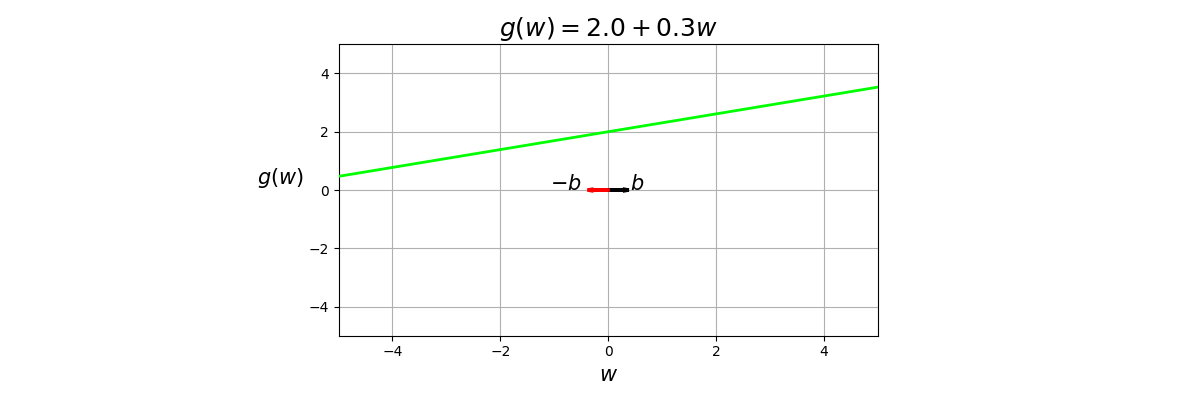
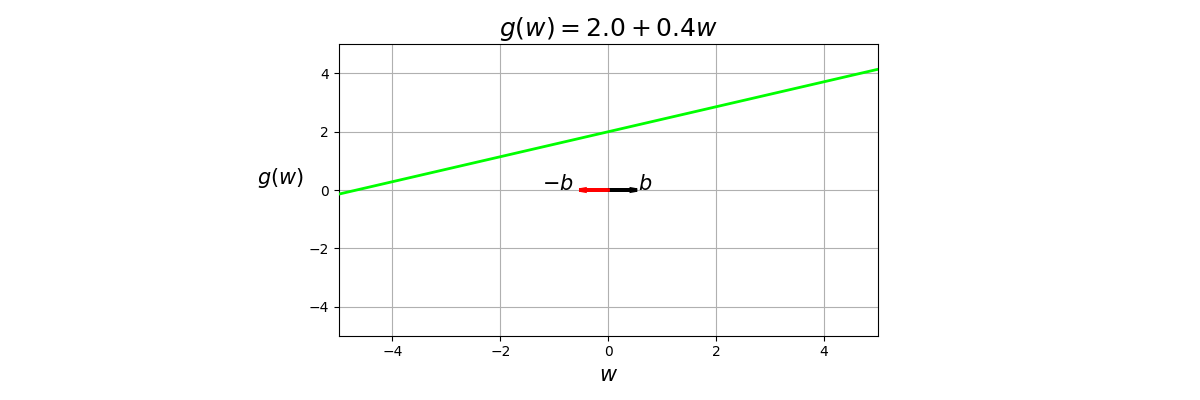
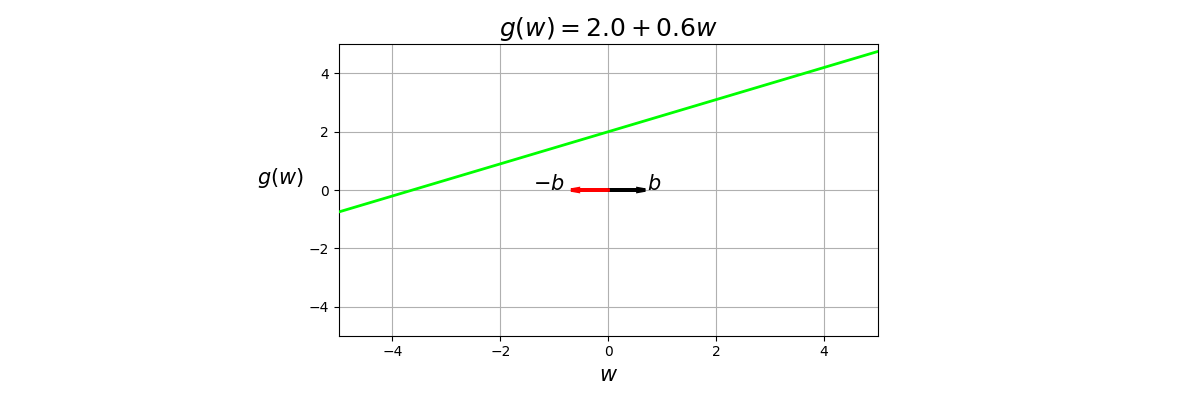
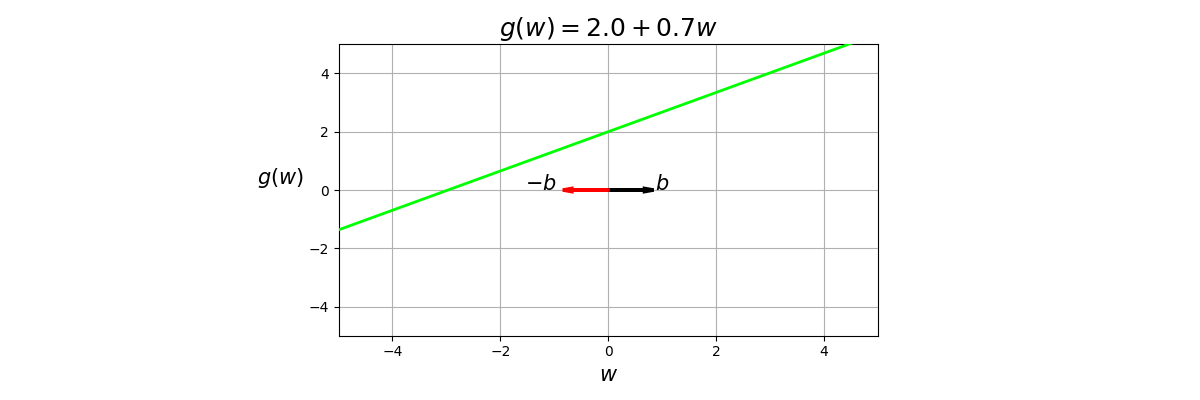
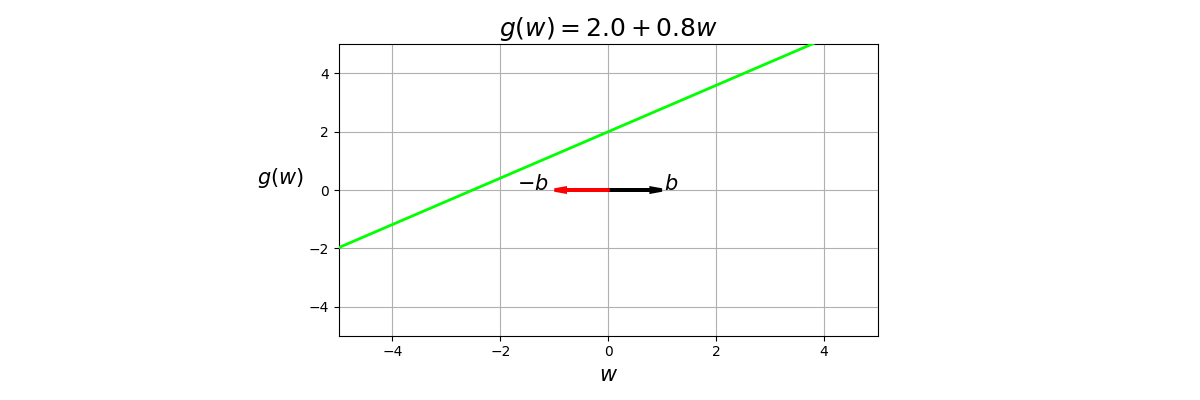
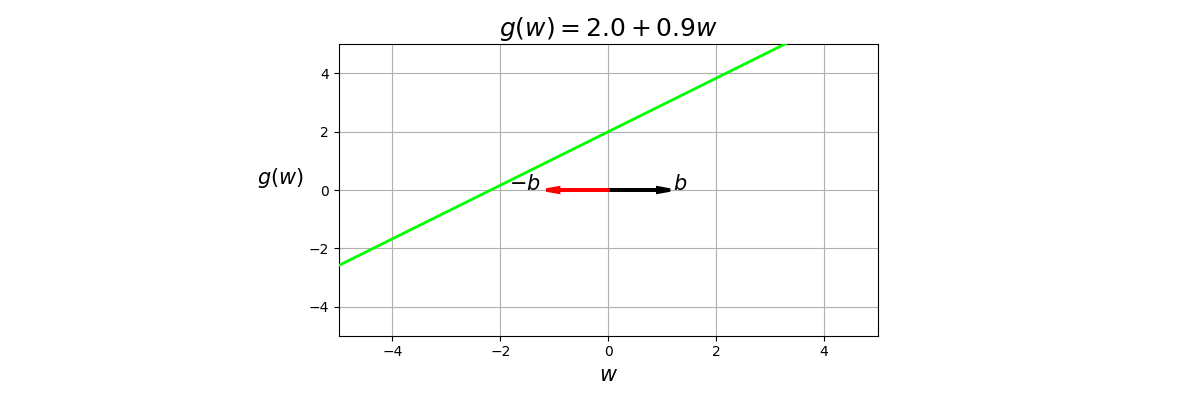
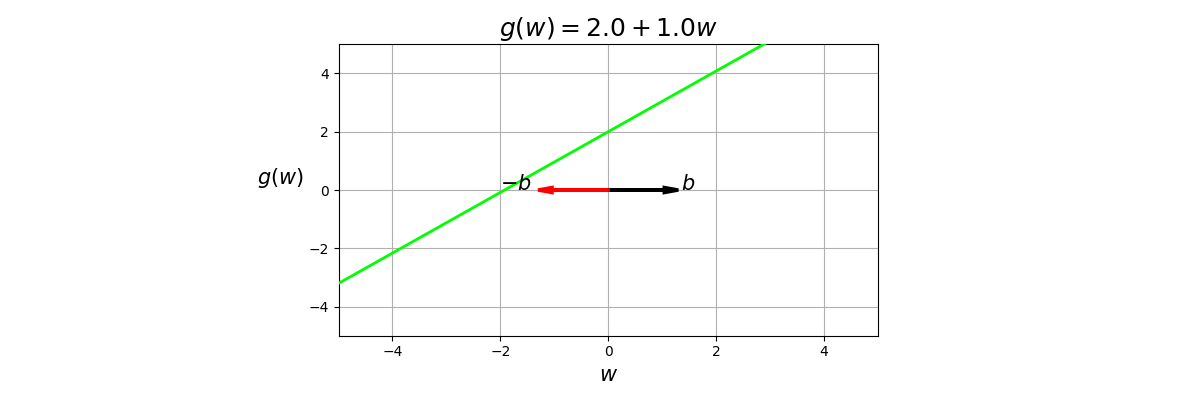
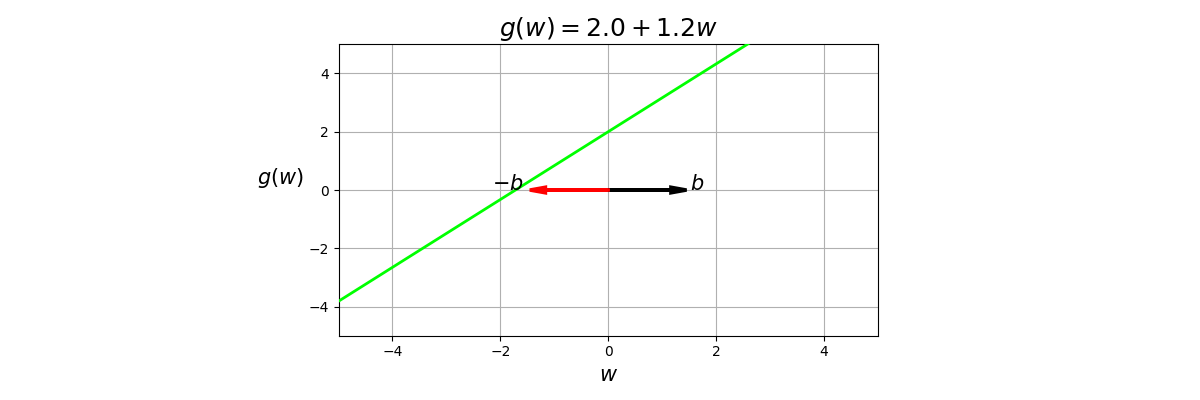
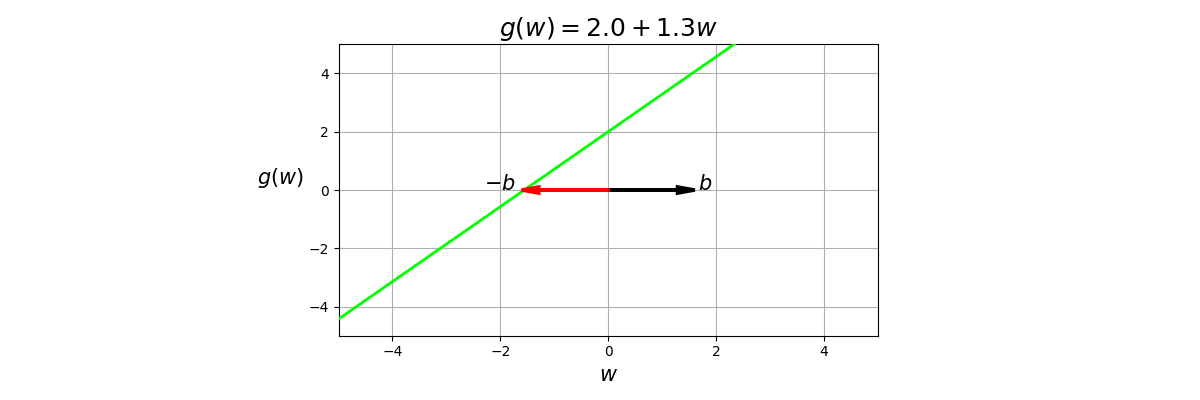
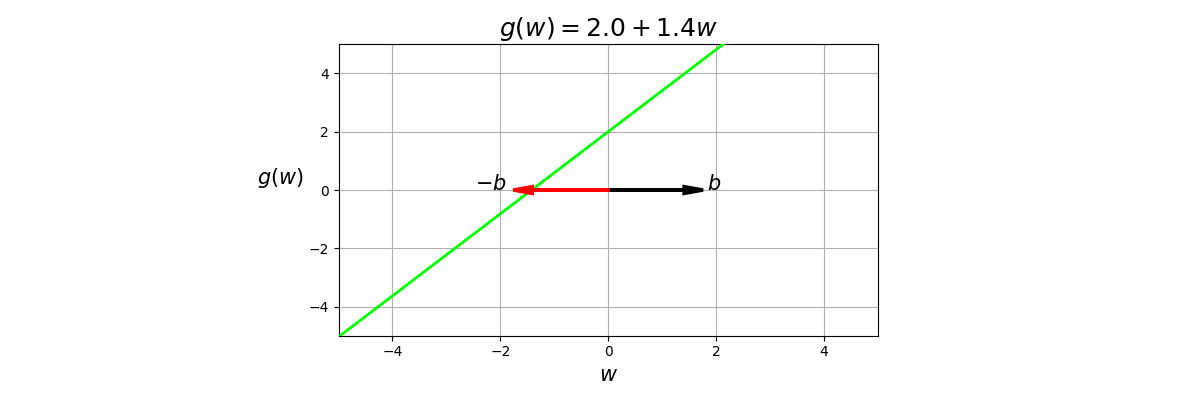
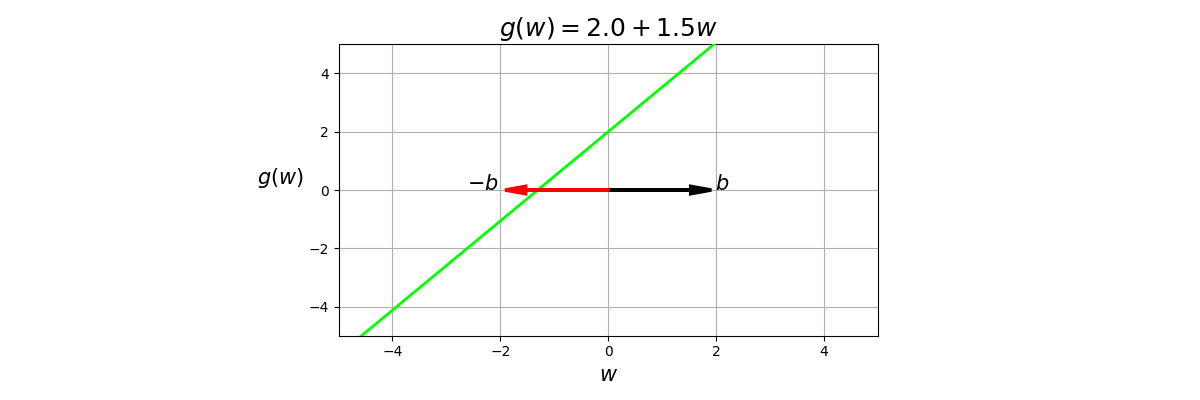
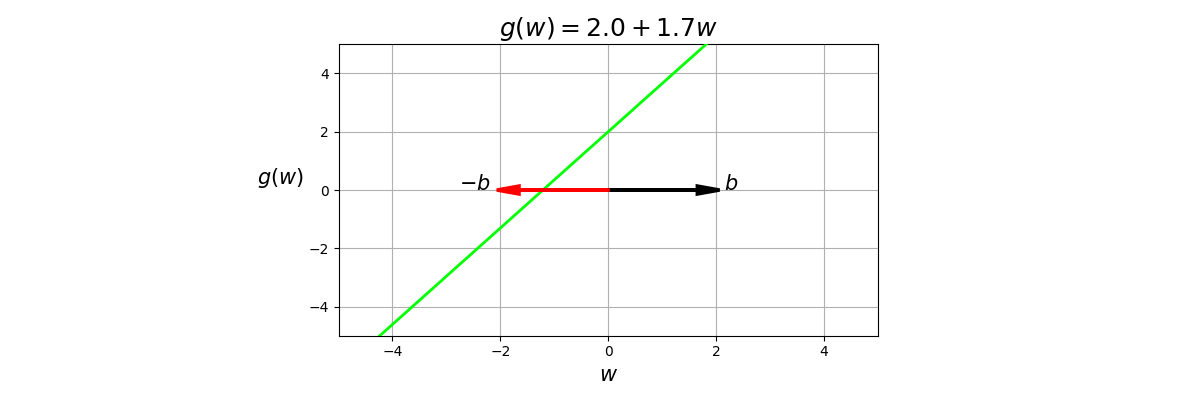
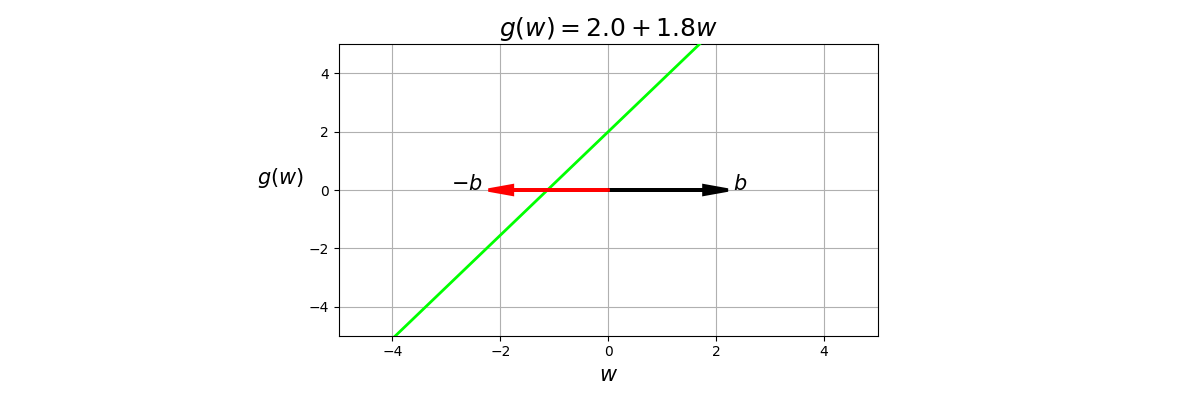
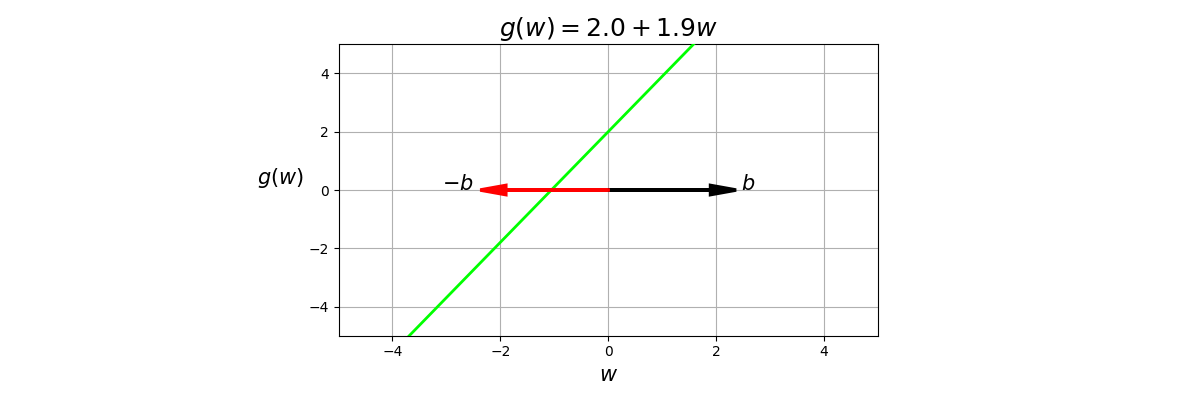
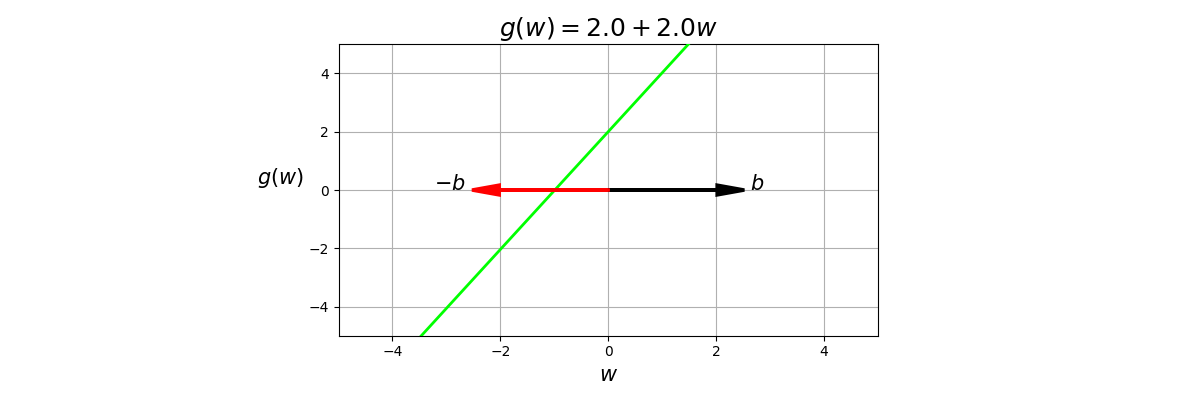
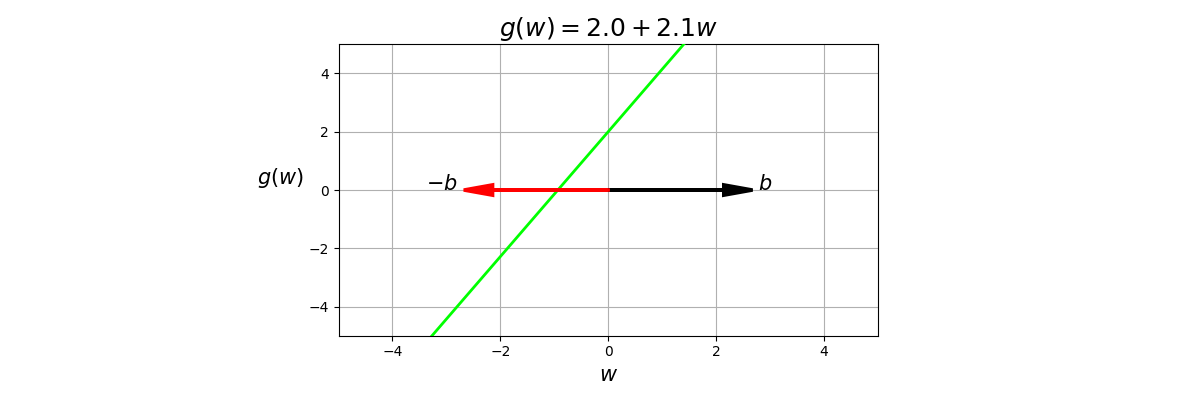
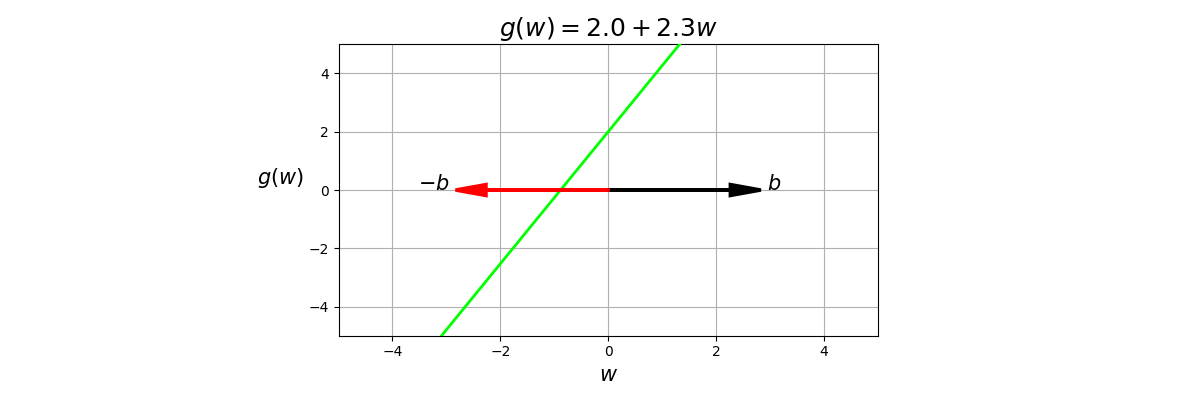
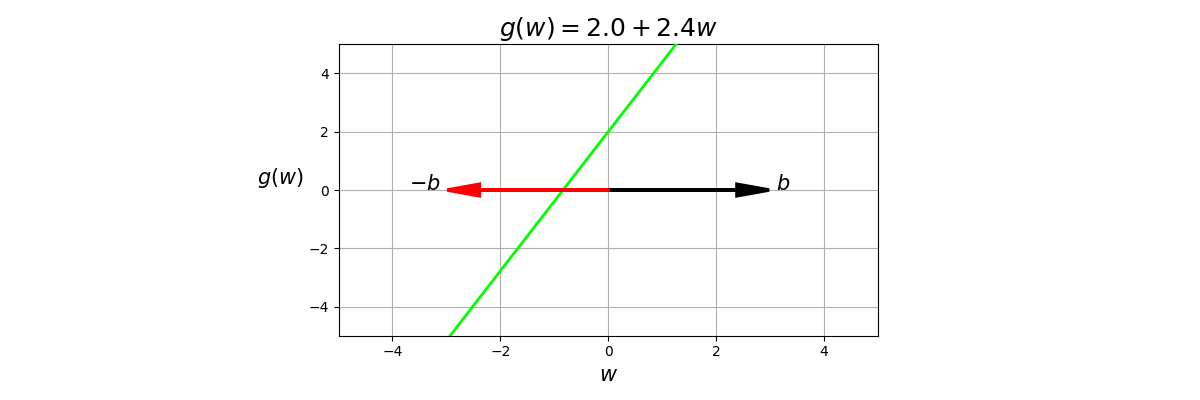
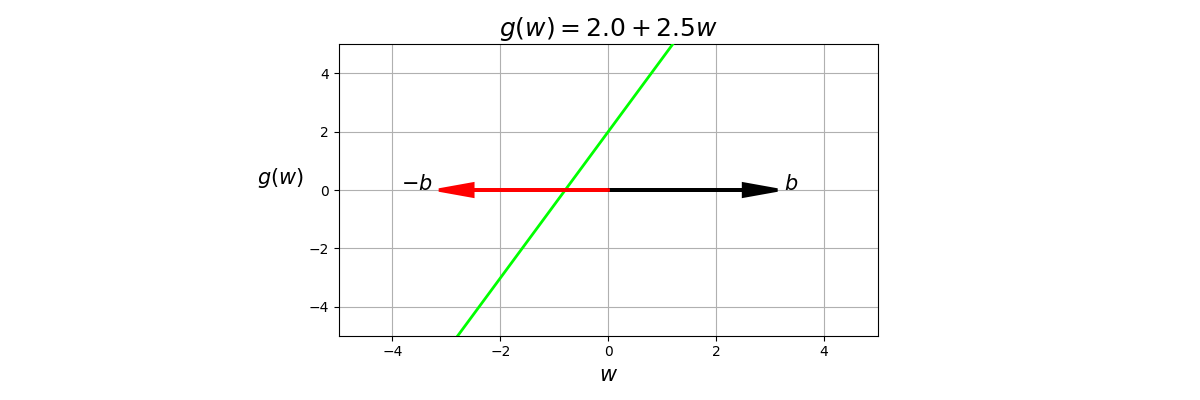
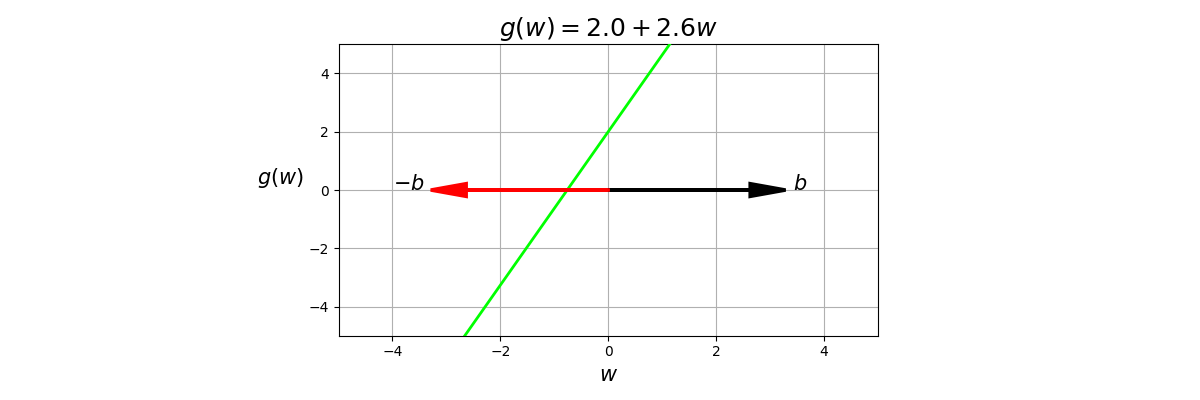
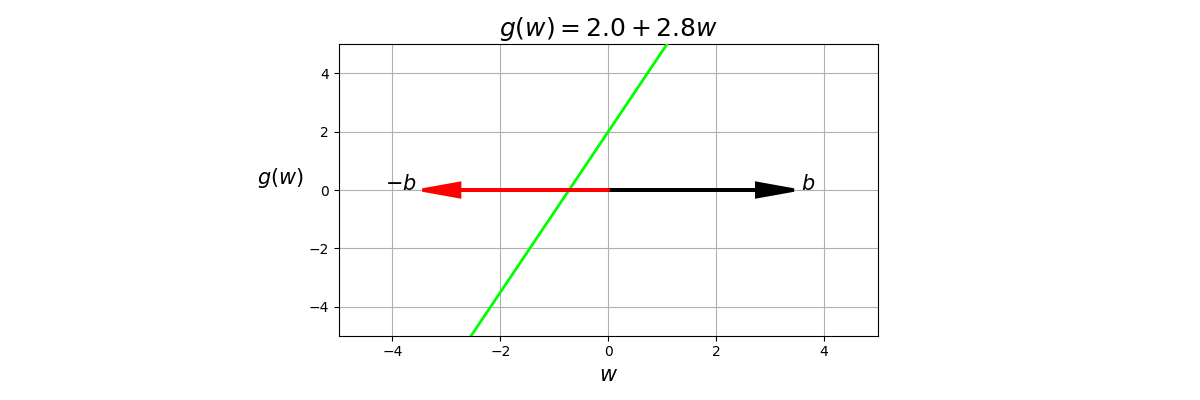
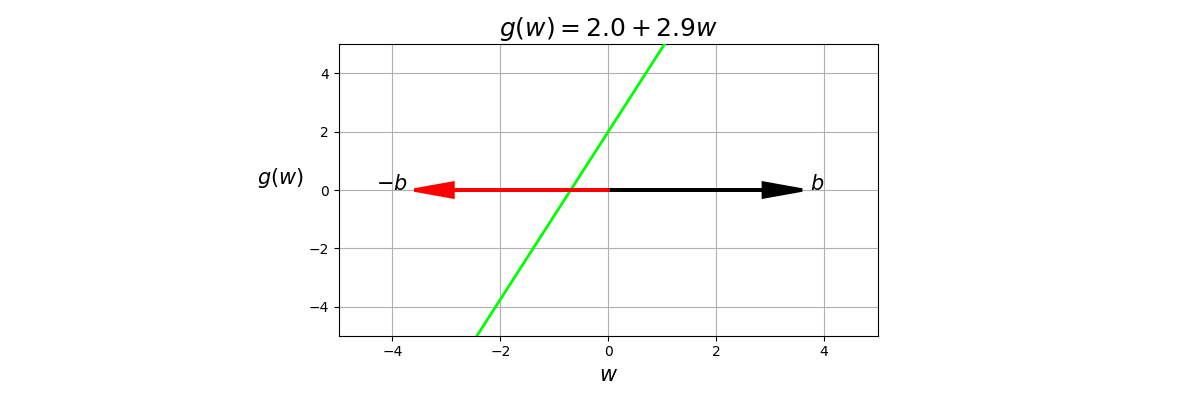
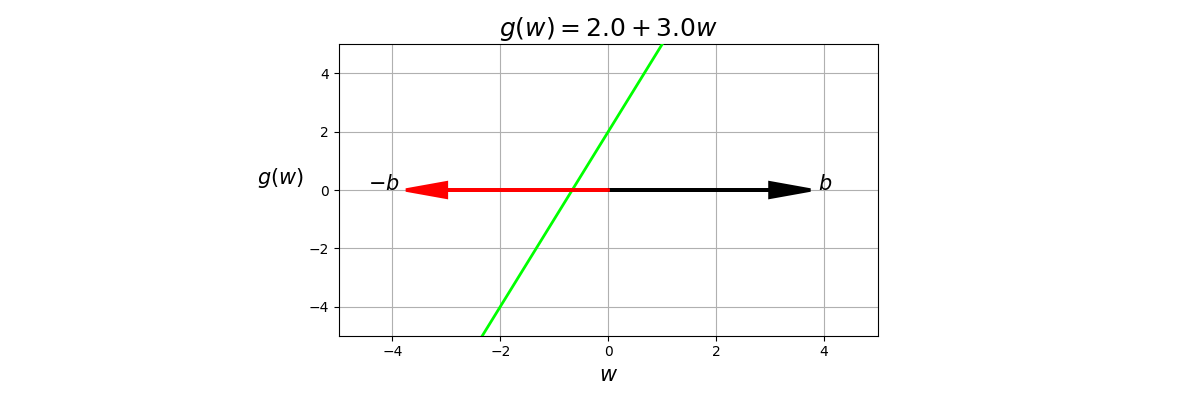

In [3]:
# animate 2d slope visualizer
func = lambda w: 2 + 3*w
callib.slope_visualizer.animate_visualize2d(func = func,num_frames = 50)

---

In three dimensions - where we have two input variables $w_1$ and $w_2$ - we can form a similar equation using a single input.  For example, the formula

\begin{equation}
g(w_1,w_2) = a + bw_1
\end{equation}

takes in the first input $w_1$ and treats it like a line, outputing $a + bw_1$.  We can still say that this hyperplane - like the corresponding line - has a steepness or slope given by $b$.  The only difference is that this steepness is now defined over a two dimensional input space.

However in three-dimensions this is not just a line - its a line in $w_1$ stretched along the $w_2$ input dimension - forming a *hyperplane*.  

We plot the two and three dimensional versions of the line $g(w_1,w_2) = 2-w_1$ side by side in the Python cell below.   

<IPython.core.display.Javascript object>


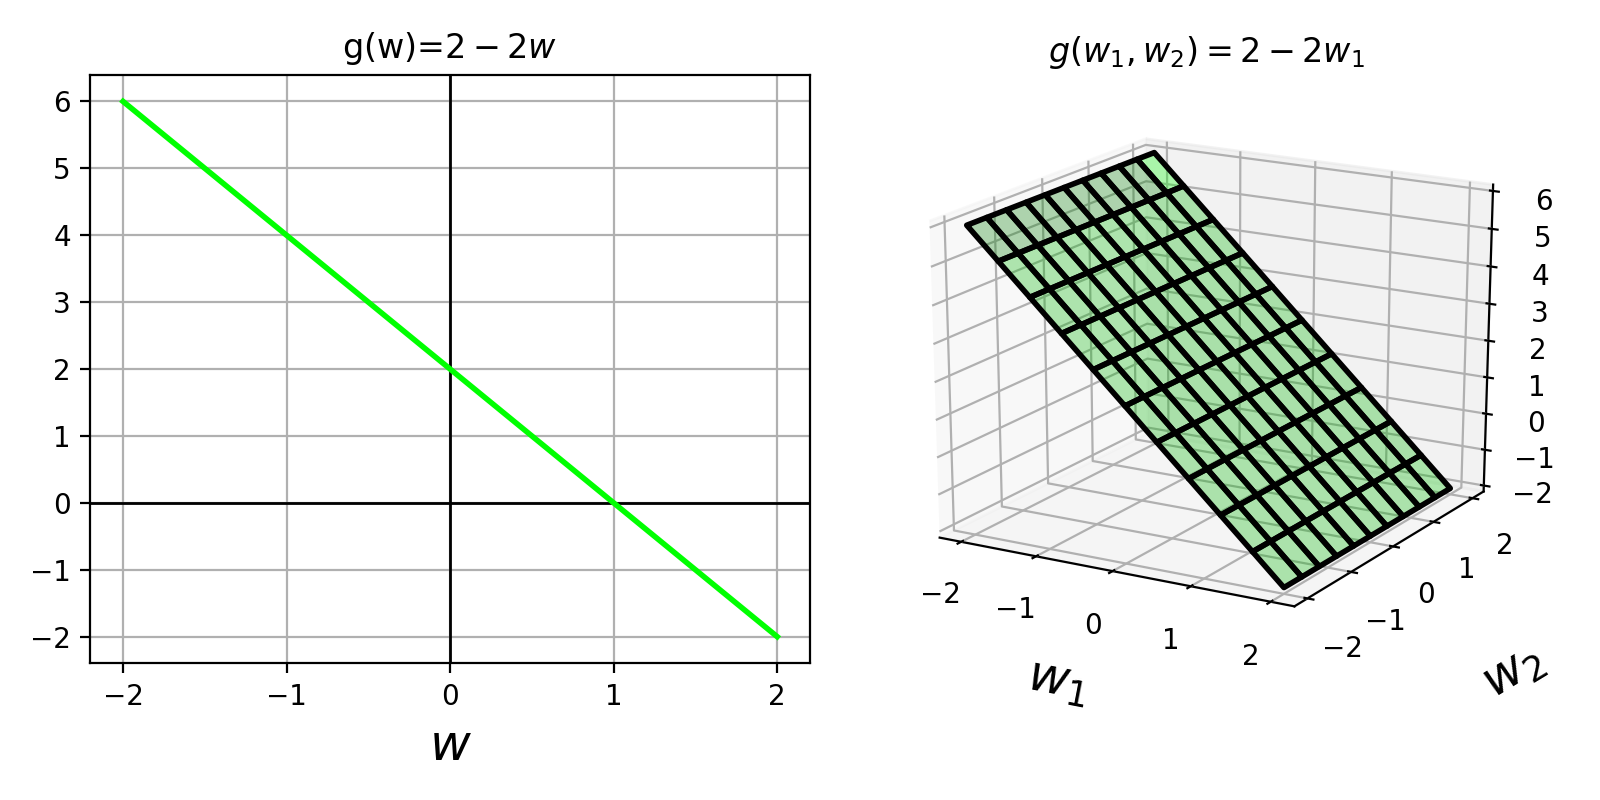

In [4]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: 2-2*w 
func2 = lambda w: 2-2*w[0] 

# use custom plotter to show both functions
title1 = '$g(w)=$2-2w$'; title2 = '$g(w_1,w_2)=2-2w_1$';
callib.plotter.double_2d3d_plot(func1 = func1, func2 = func2,title1 = title1,title2=title2,fontsize = 18,color = 'lime')

Like the one dimensional example, here we can visualie the *directions of steepest ascent and descent* - given by this individual direction slope of the hyperplane - as a vector in the input space.  Of course here the input space is two-dimensional, hence the vector has two entries.  

For example, with the previous example of $g(w_1,w_2) = 2-2w_1$ the ascent direction is $\left(b_1,0\right) = (-2,0)$ and descent direction $-\left(b_1,0\right) = (2,0)$.  We animate a hyperplane and these vectors - the ascent vector colored blue, the descent color in red - along a range of values for $b_1$ beginning with $b_1 = -2$ in the Python cell below.


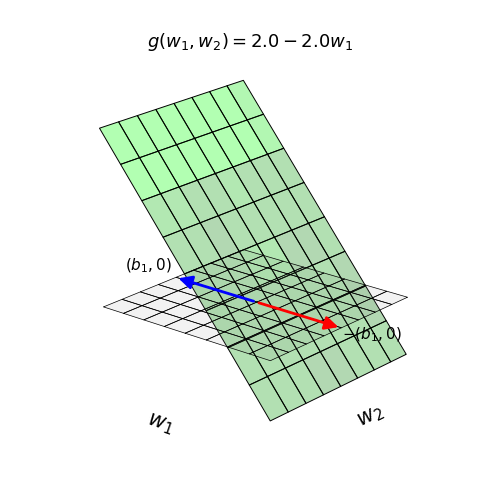
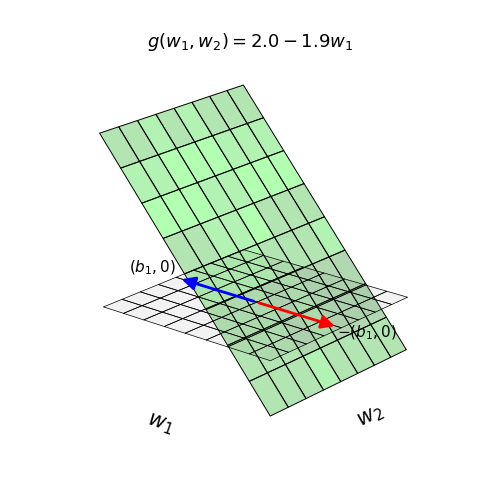
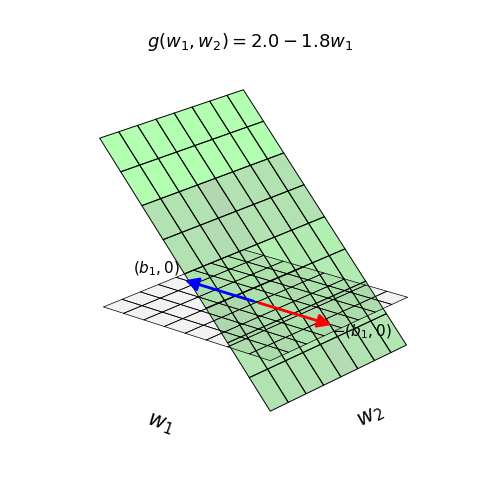
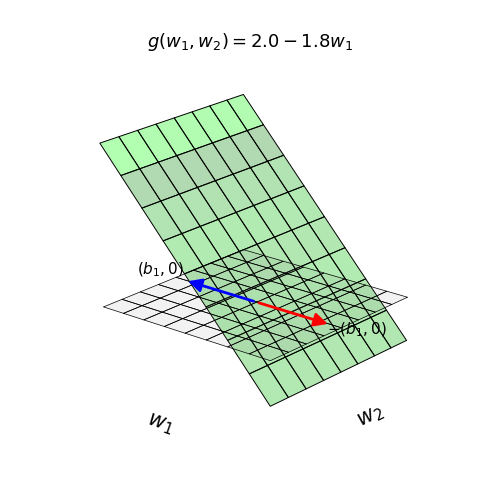
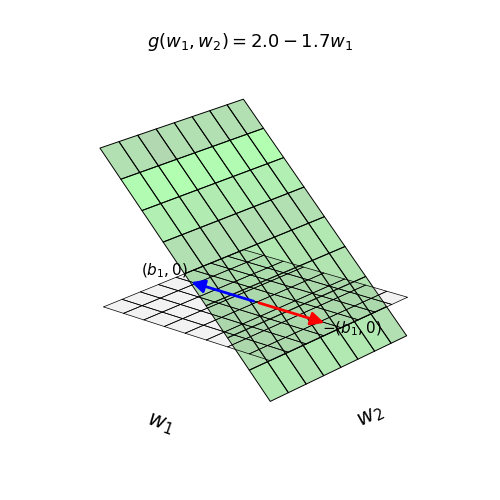
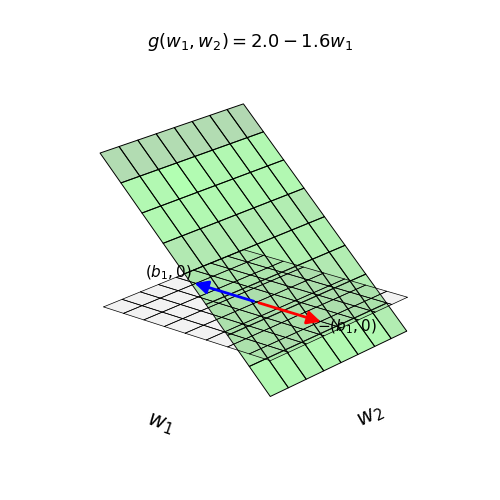
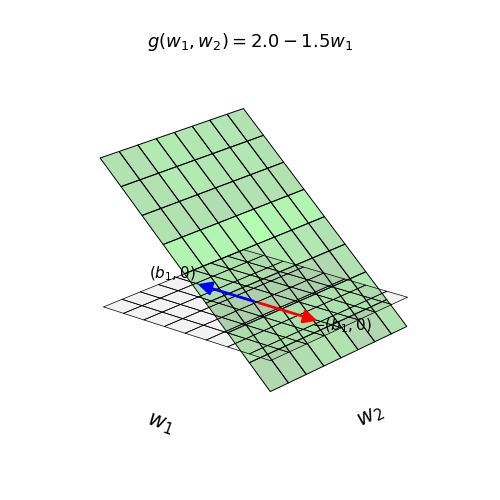
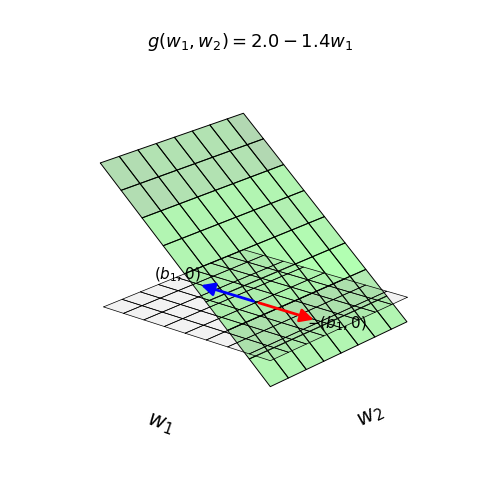
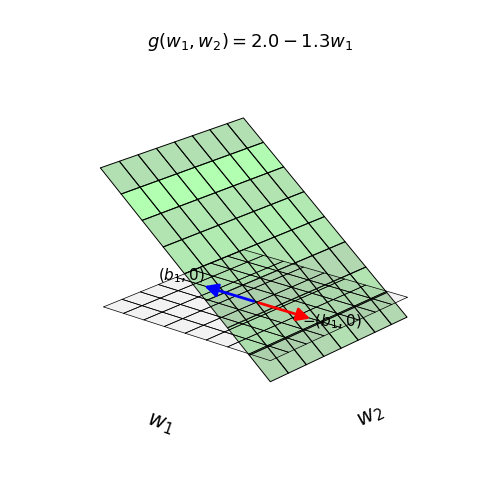
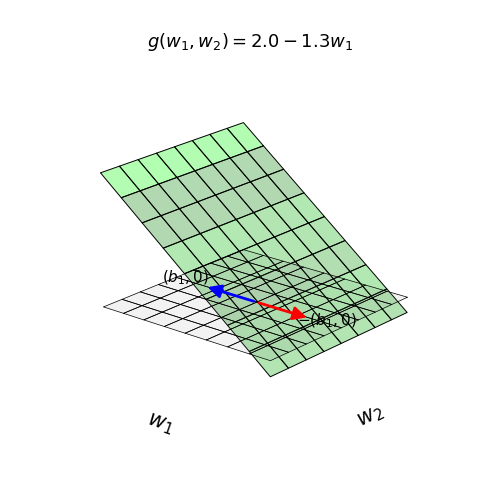
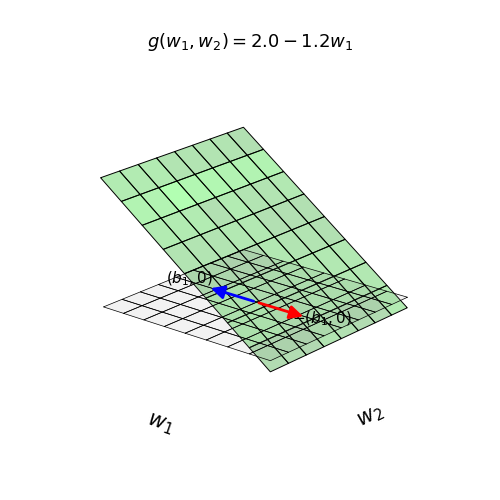
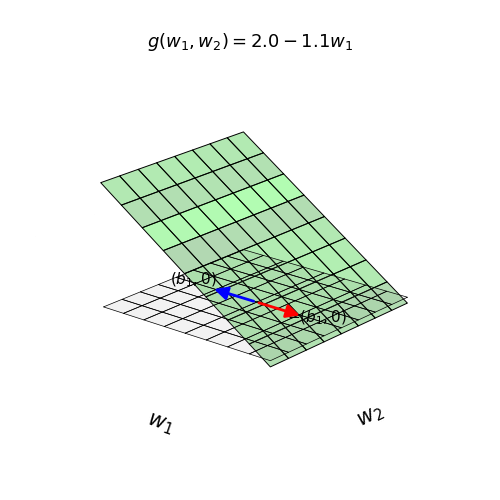
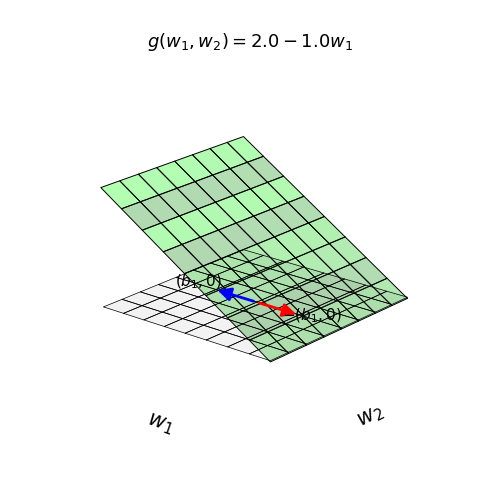
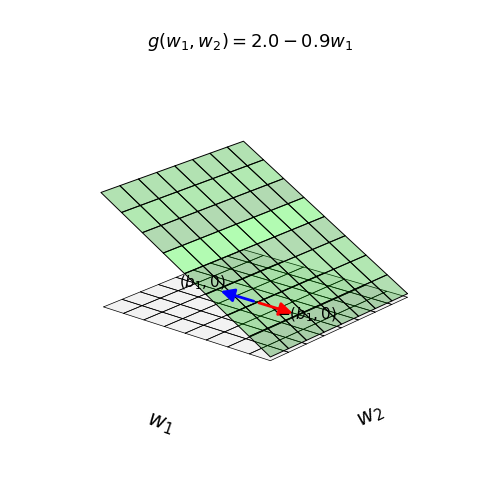
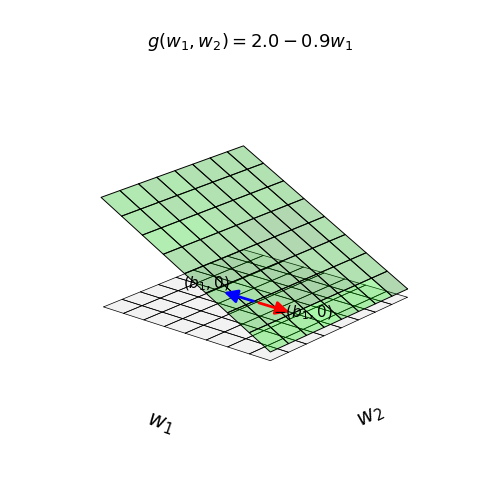
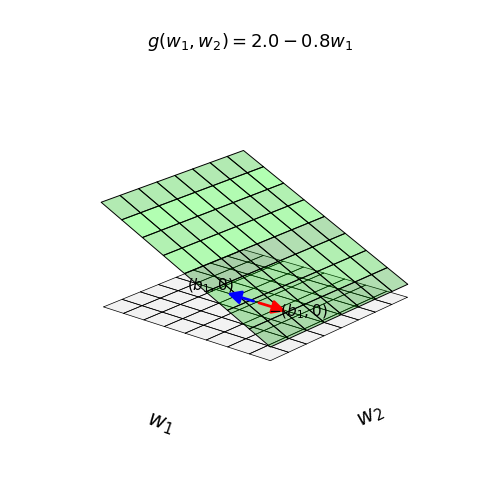
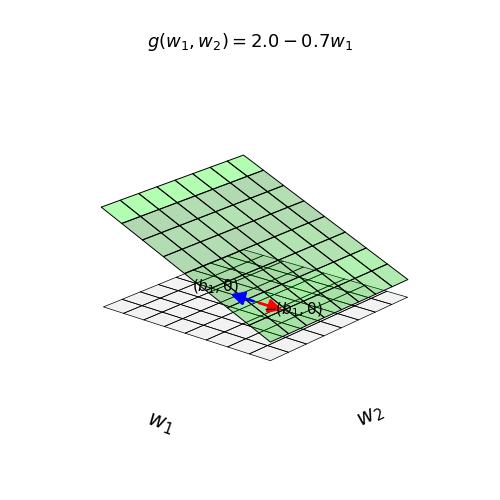
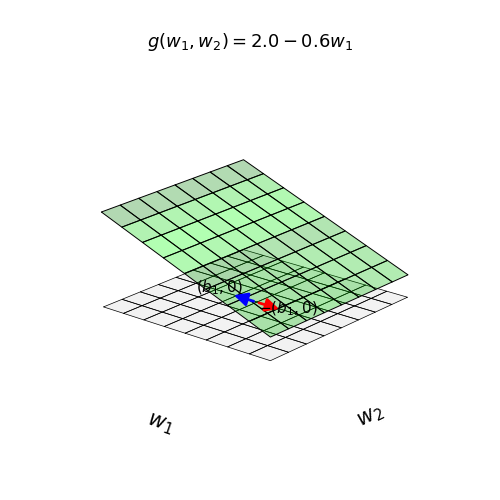
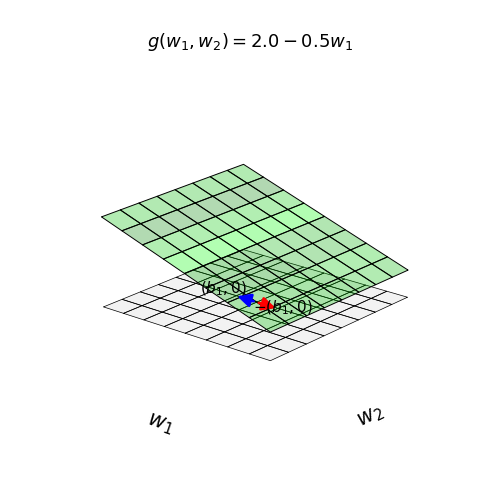
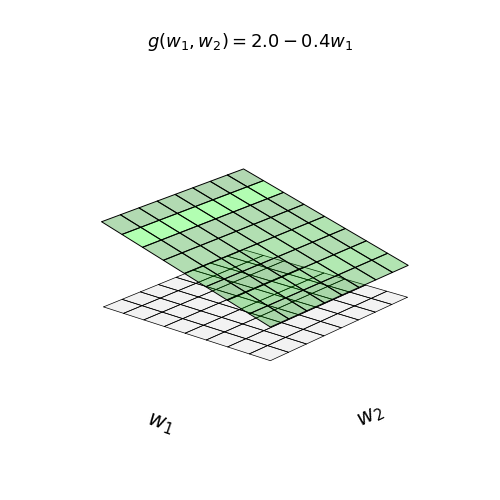
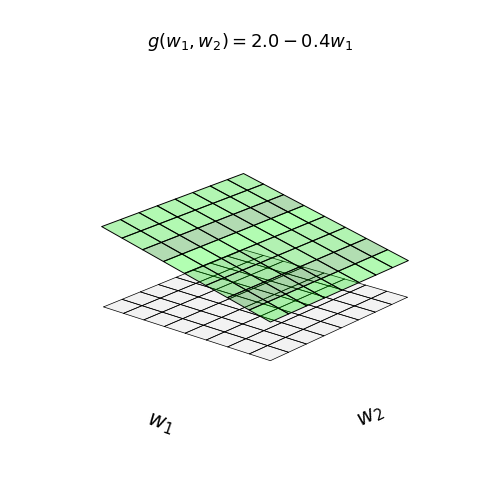
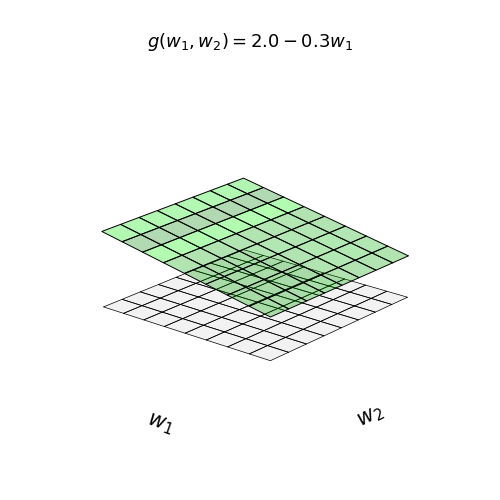
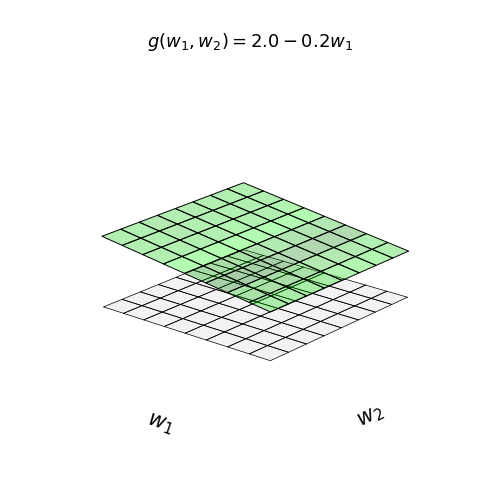
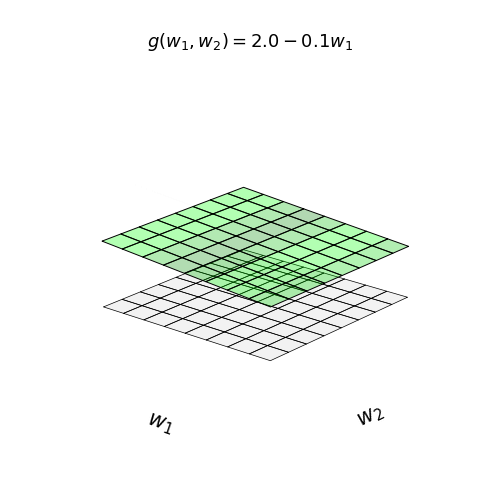
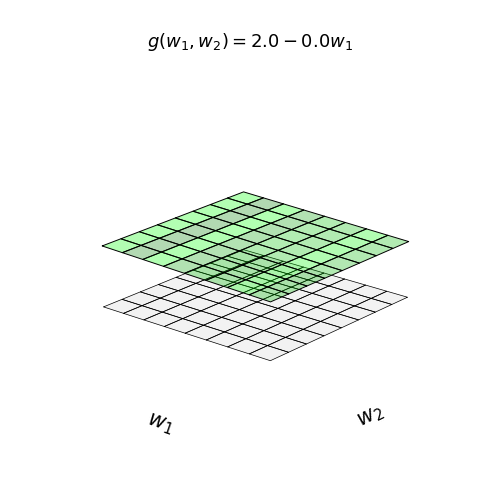
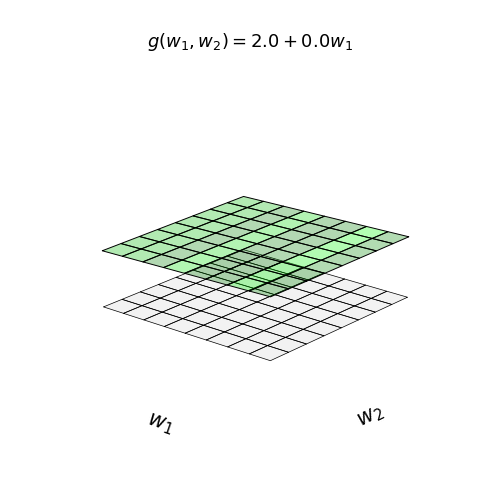
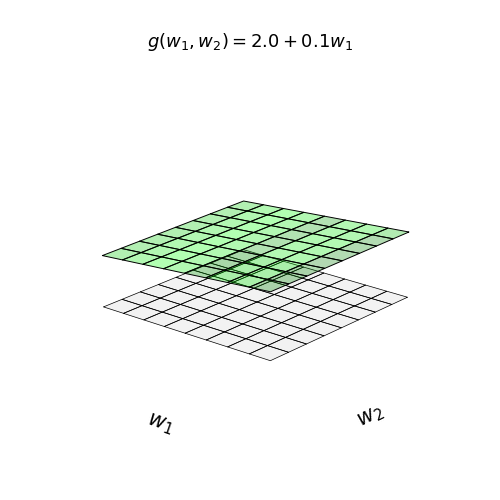
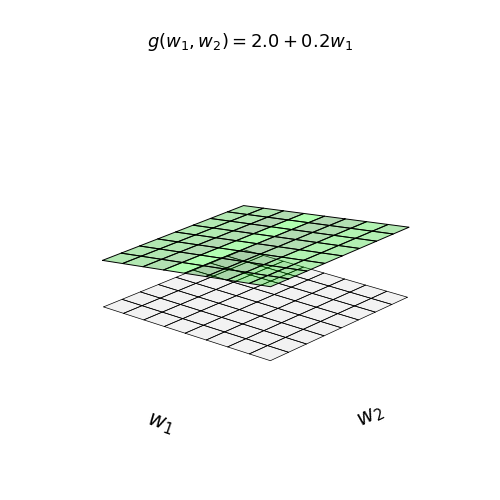
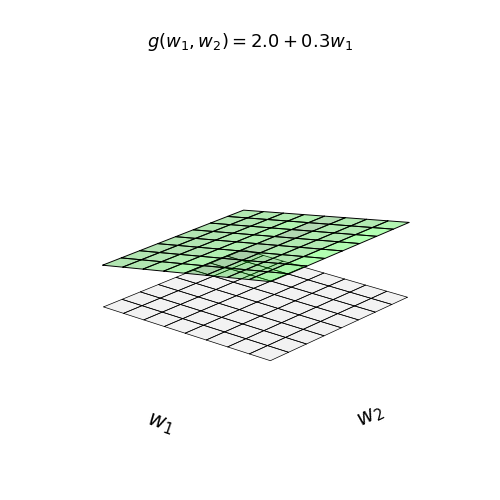
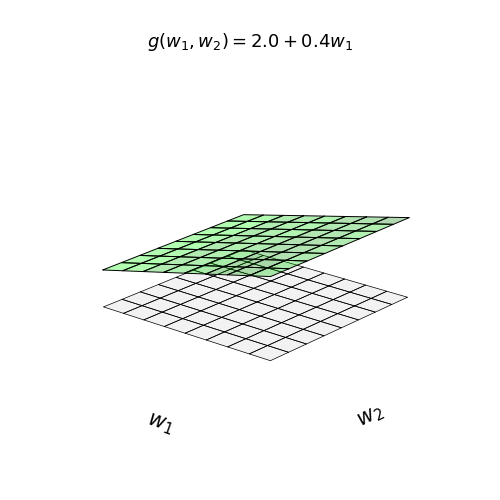
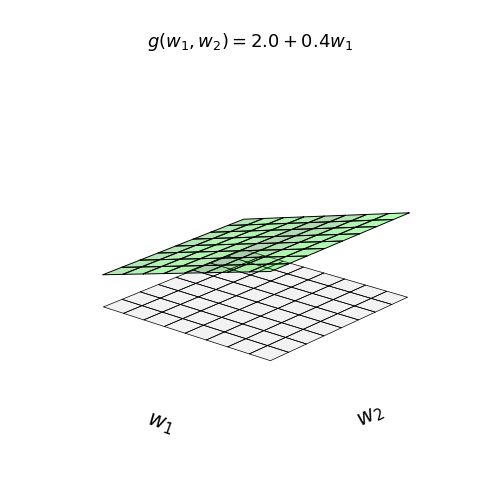
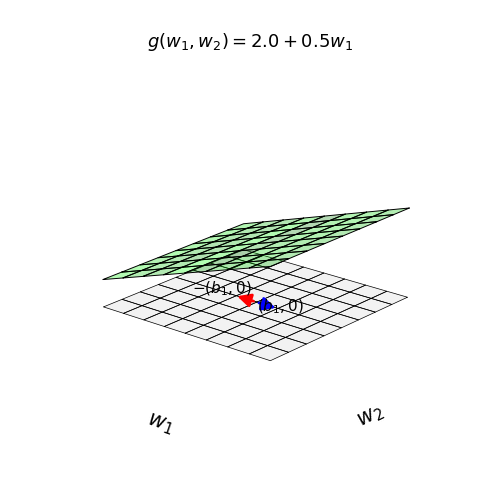
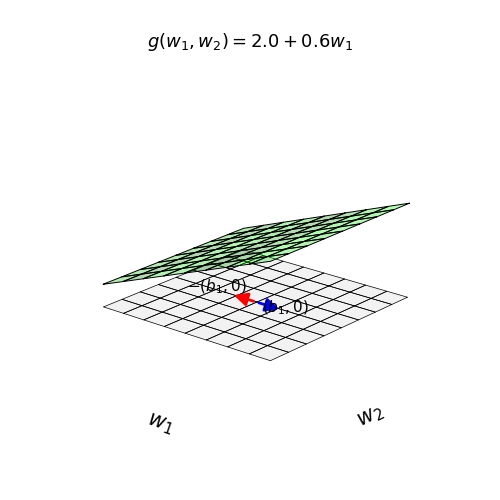
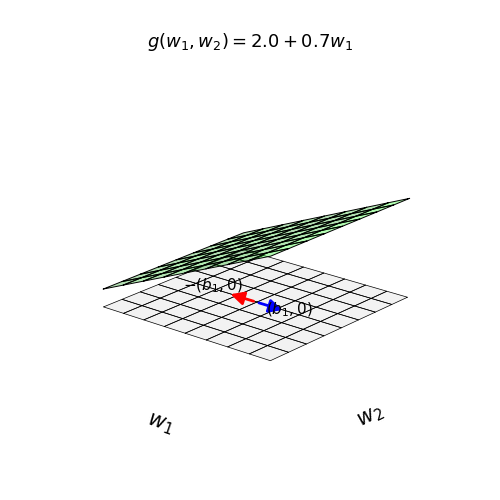
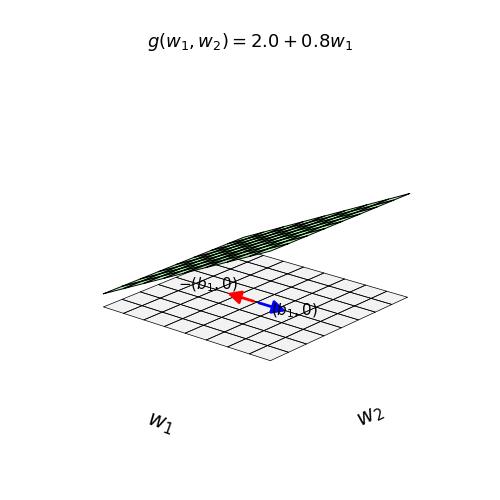
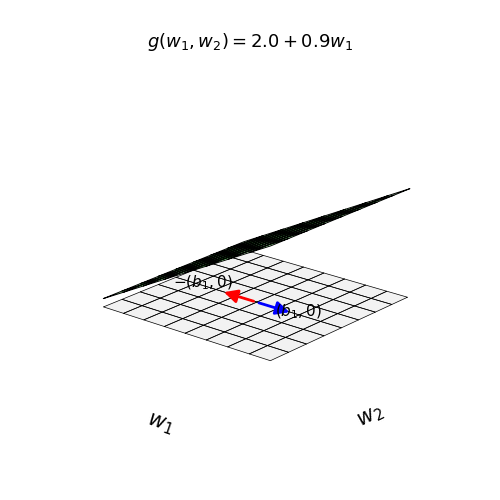
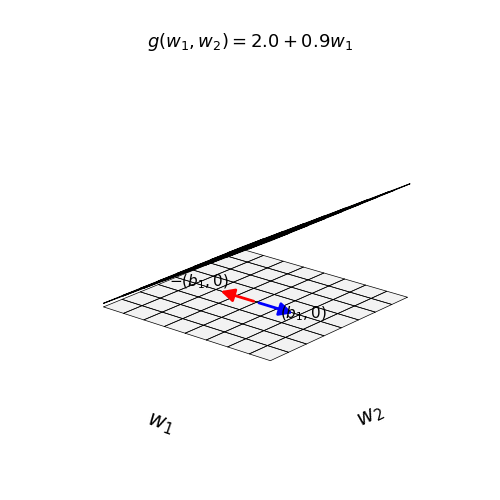
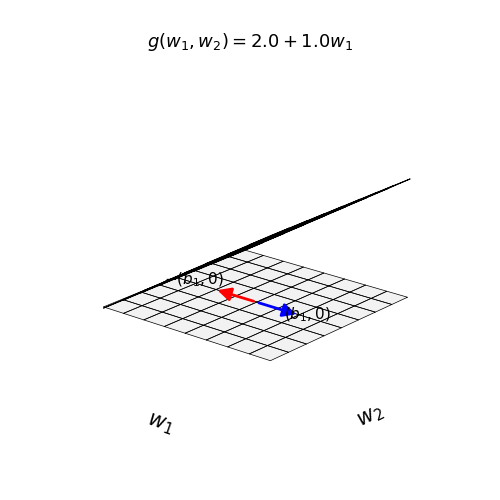
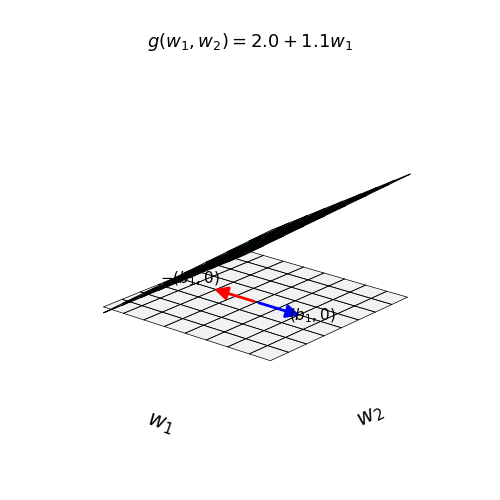
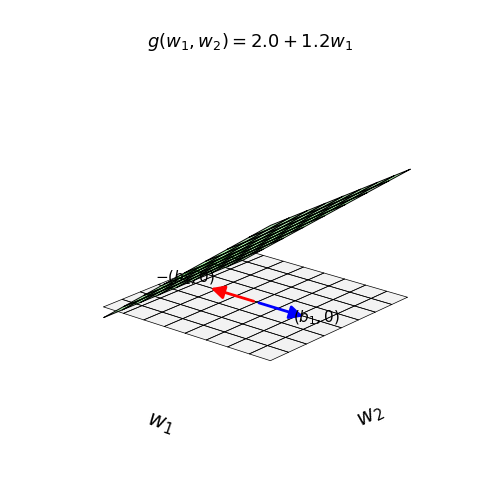
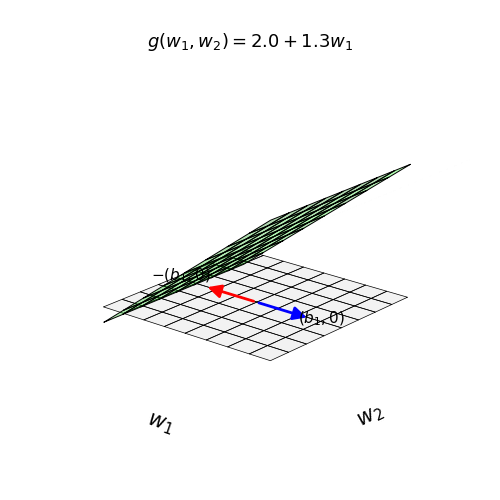
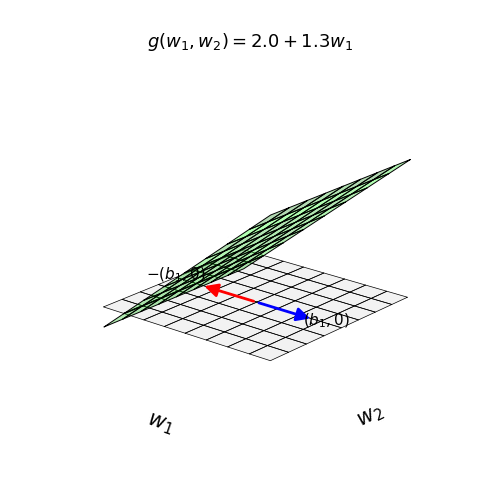
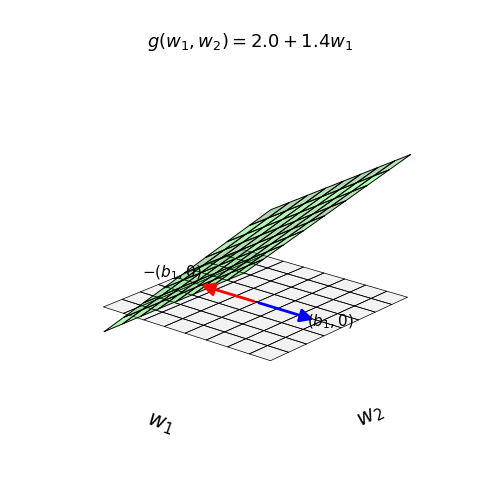
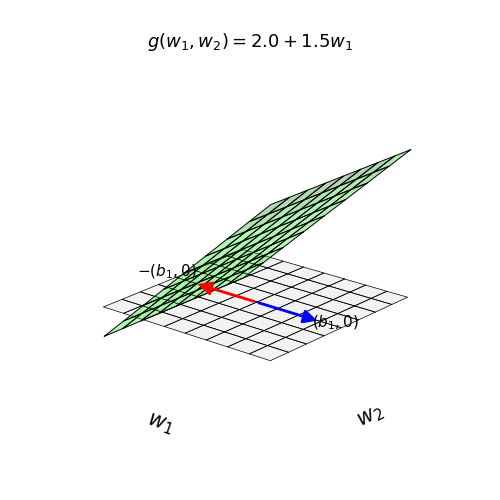
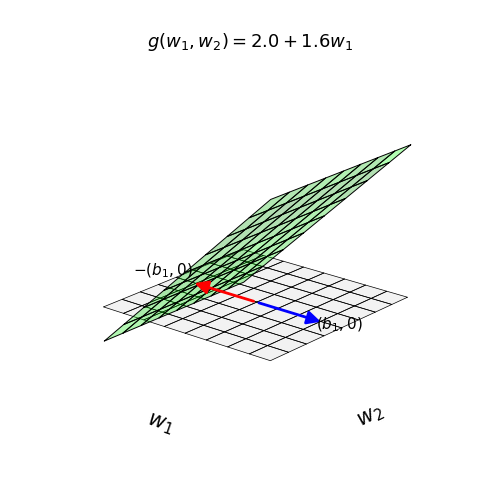
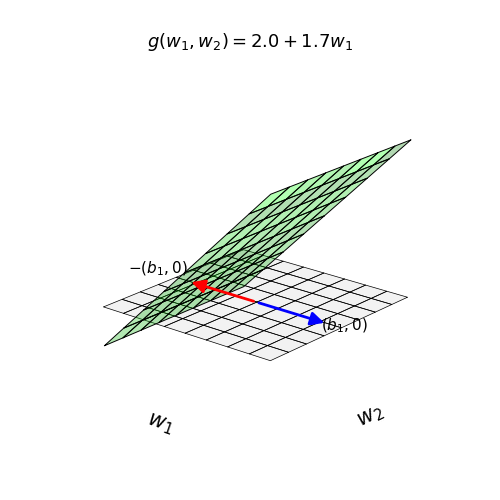
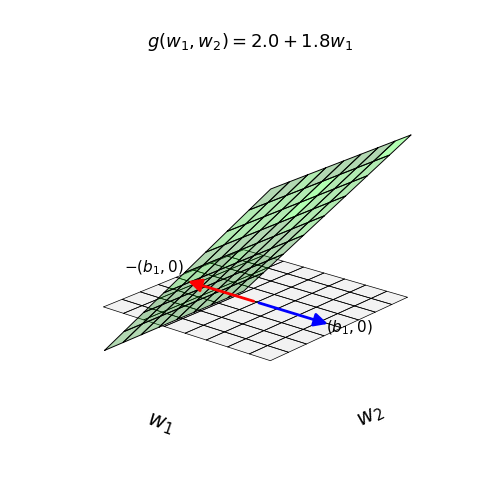
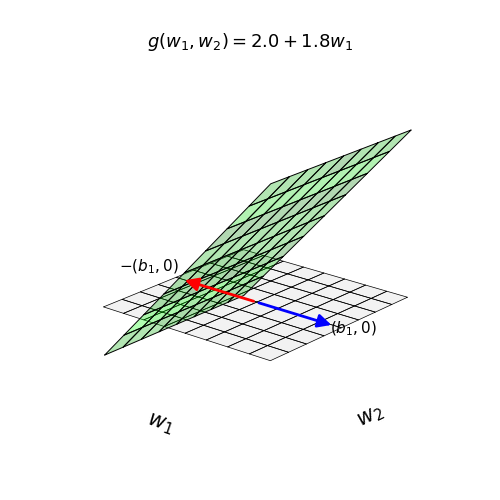
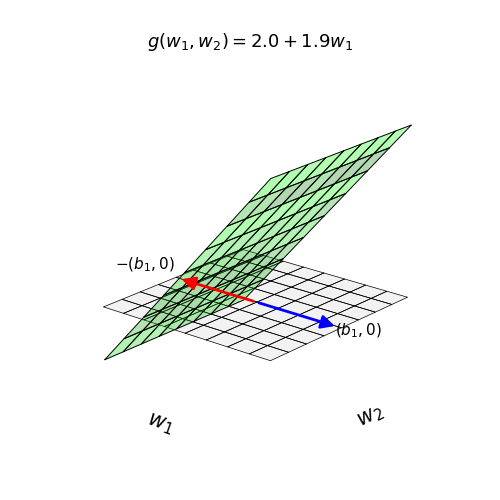
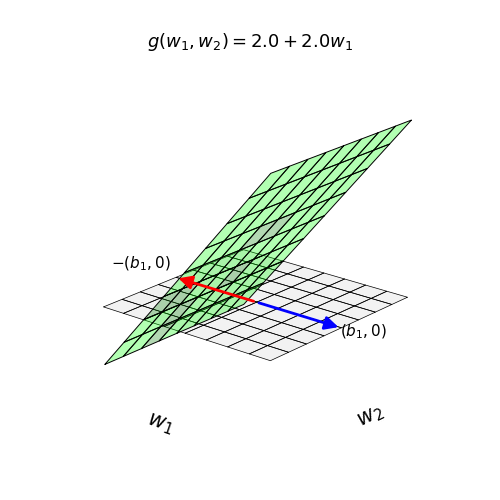

In [5]:
# define hyperplane
func = lambda w:  2-2*w[0]

# animate 2d slope visualizer
callib.slope_visualizer.animate_visualize3d(func=func,num_frames=50)

And of course we can define this single input hyperplane along any dimension we want.  In general if we have $N$ possible inputs $\mathbf{w}=[w_1,\,\,w_2,\,\,\cdots\,w_N]$ we can define it along the $n^{th}$ dimension as $g(\mathbf{w}) = a + bw_n$.

## 1.2  Constructing general hyperplanes when $N=2$

With multiple inputs we can form more complex hyperplanes by summing up a number of single input ones like those discussed above.  For example, with $N=2$ inputs if we form the two single input hyperplanes

\begin{array}
\
g_1(w_1,w_2) = a_1 +  b_1 w_1   \\
g_2(w_1,w_2) = a_2 +  b_2 w_2   \\
\end{array}

one along each input dimension.  Adding these together gives us a more complex hyperplane $g(w_1,w_2) = g_1(w_1,w_2) + g_2(w_1,w_2)= \left( a_1 + a_2 \right) + b_1w_1 + b_2w_2$ that has a slope along each input dimension explicitly controlled by its corresponding single input hyperplane (Likewise the vertical intercept is the sum of those of the single input hyperplanes).

For example, in the next Python cell we plot the following single input hyperplanes

\begin{array}
\
g_1(w_1,w_2) = 1-2w_1 \\
g_2(w_1,w_2) = 1 + 2w_2 \\
\end{array}

as well as their sum $g(w_1,w_2) = 2 - 2w_1 + 2w_2$  This creates a more complicated hyperplane with a vertical intercept of $+2$ and a new direction of steepest ascent which is the sum of those of each individual hyperplane: along the $w_1$ direction of steepness is $\left(b_1,0\right) = (-2,0)$, along $w_2$ it is $(0,b_2) = (0,2)$ and so the direction of steepest descent for the complex hyperplane is $\left(b_1,b_2\right) = (-2,2)$ with the descent direction then being the negative of this: $-\left(b_1,b_2\right) = (2,-2)$

In the Python cell below we plot $g_1$, $g_2$, and $g_1 + g_2$ in the left, middle, and right panels respectively.  The direction of steepesst ascent in each individual dimension hyperplane is illustrated as a blue vector and descent vector in red in the left two panels, while the direction of steepest ascent is shown in black in the right panel with the complex hyperplane.

<IPython.core.display.Javascript object>


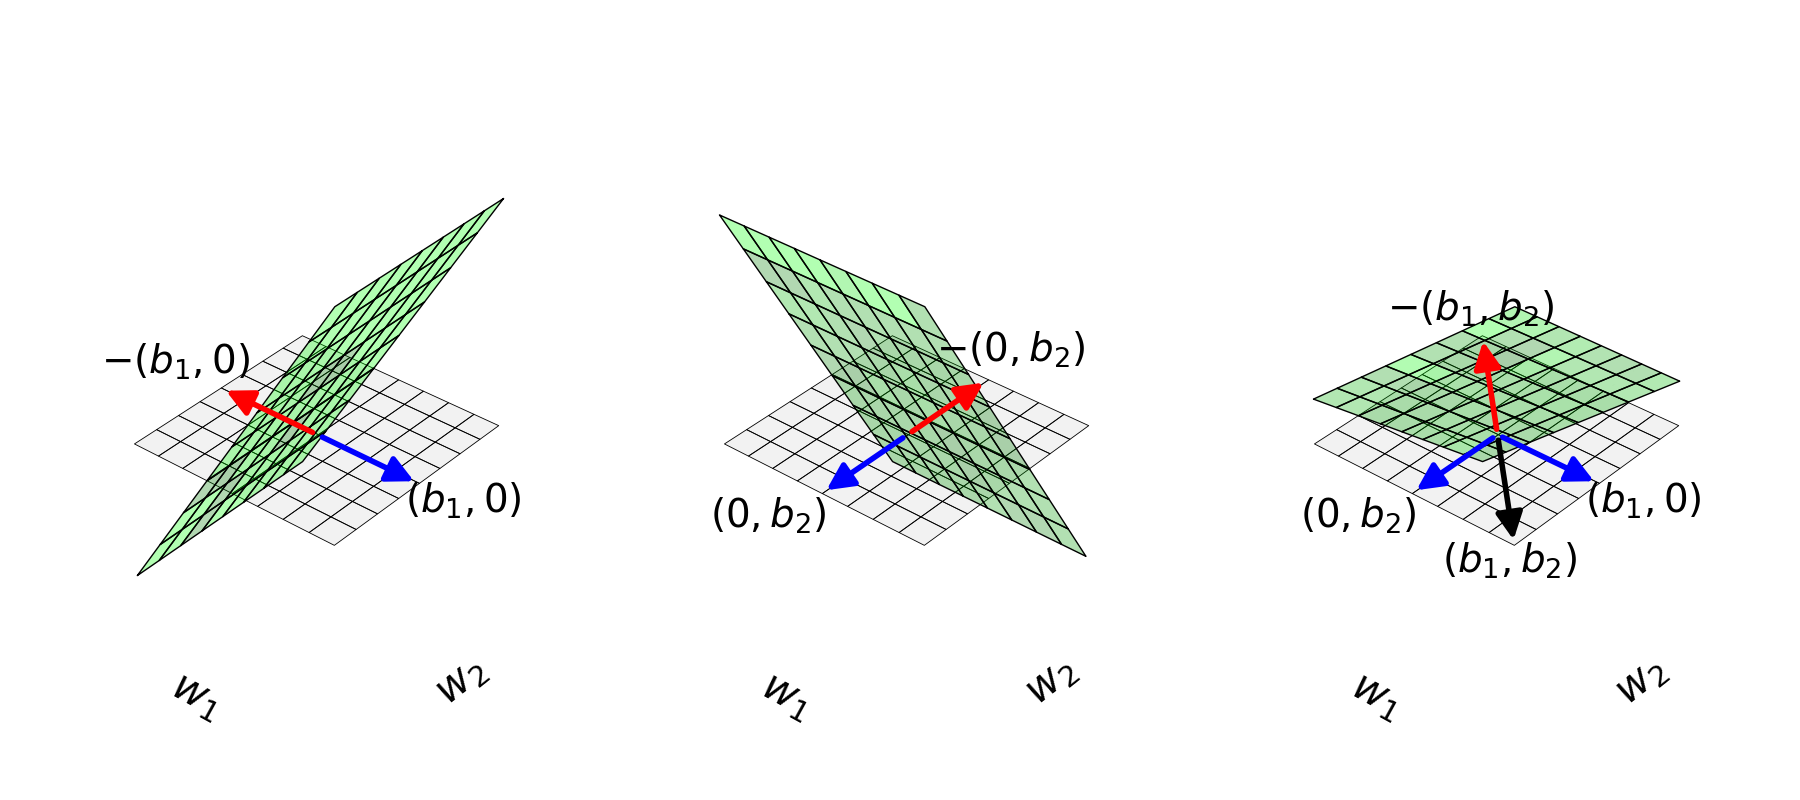

In [6]:
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: 1 + 2*w[0] 
func2 = lambda w: 1 - 2*w[1] 
func3 = lambda w: 2 + 2*w[0] -2*w[1]  

# use custom plotter to show both functions
view = [25,-50]
callib.slope_visualizer.visualize3d(func1 = func1,func2=func2,func3=func3,view = view)

In the next Python cell we animate a range of complex hyperplanes starting with

\begin{equation}
g(w_1,w_2) = 2 -2w_1 -2w_2 
\end{equation}

along with the direction of steepest ascent and descent colored black and red respectively. 


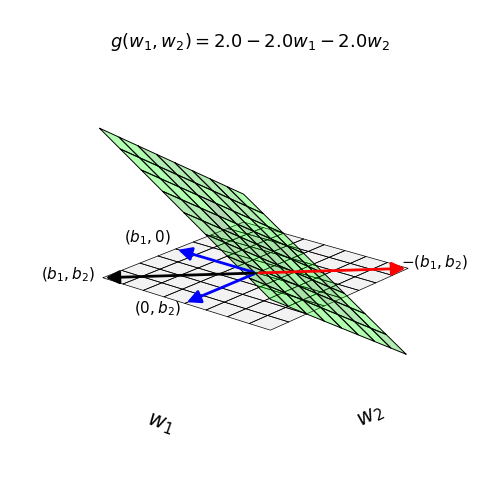
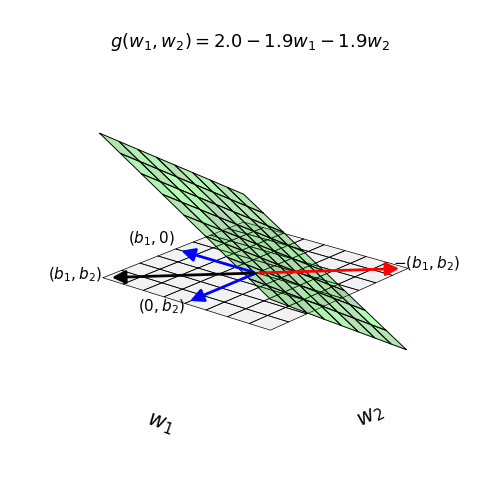
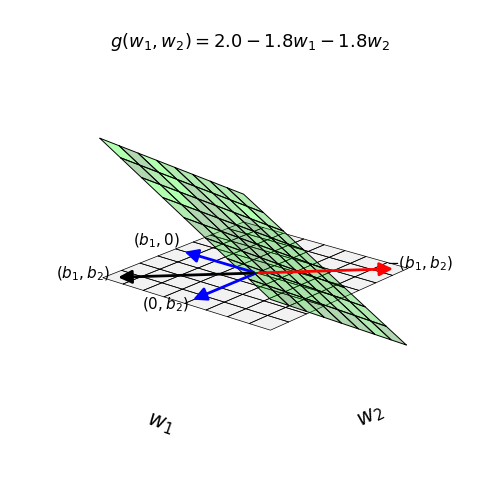
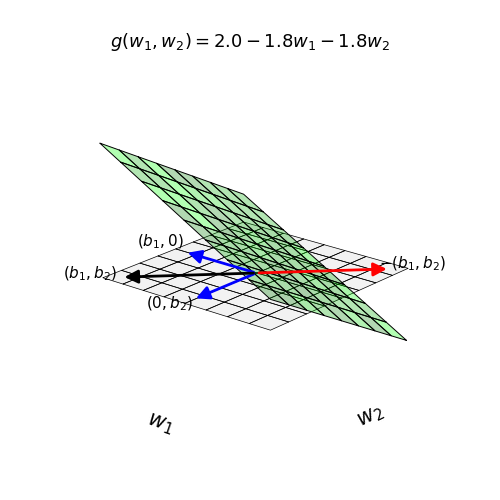
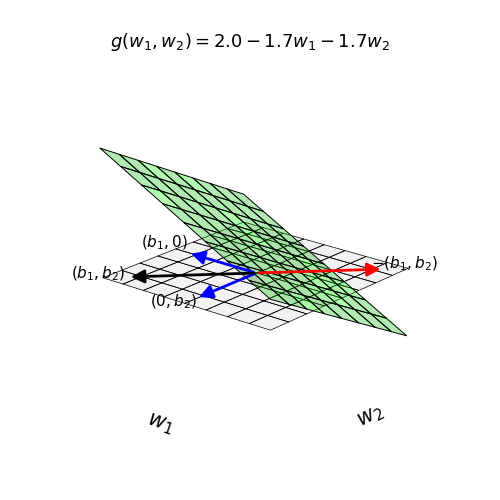
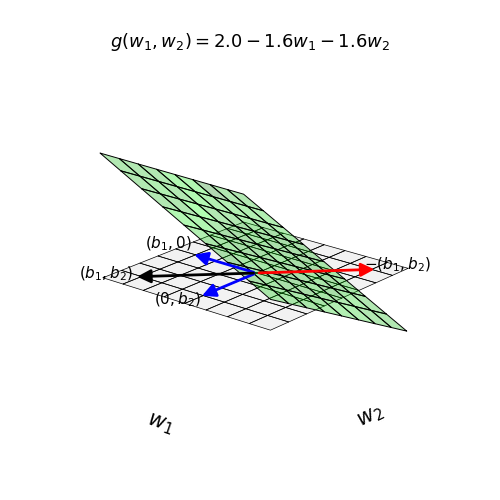
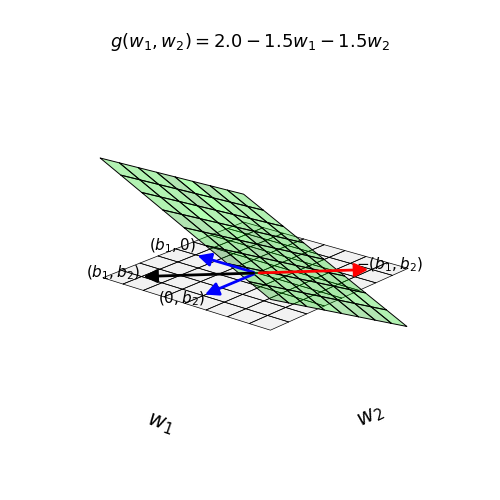
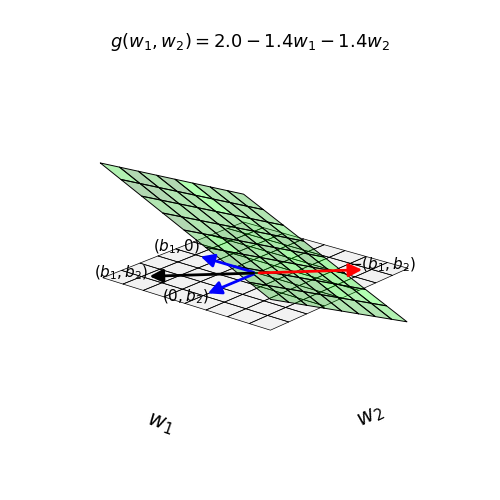
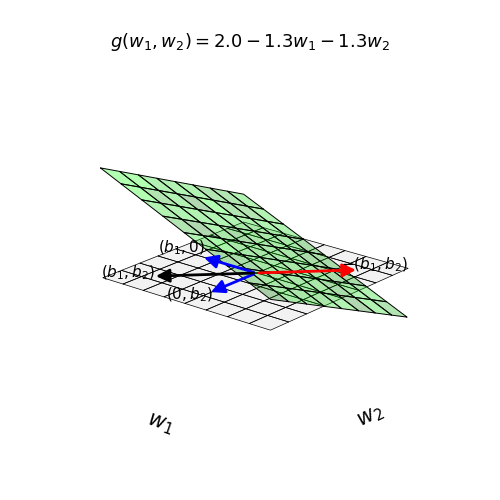
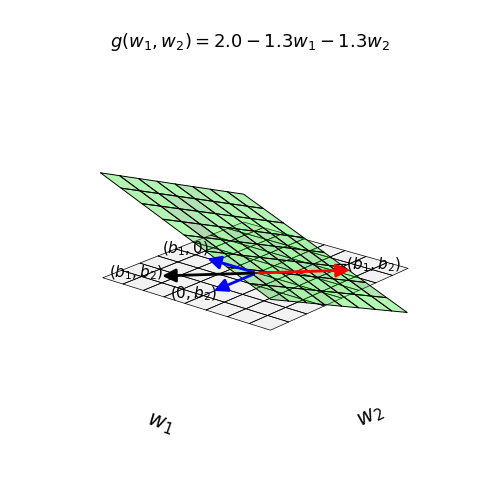
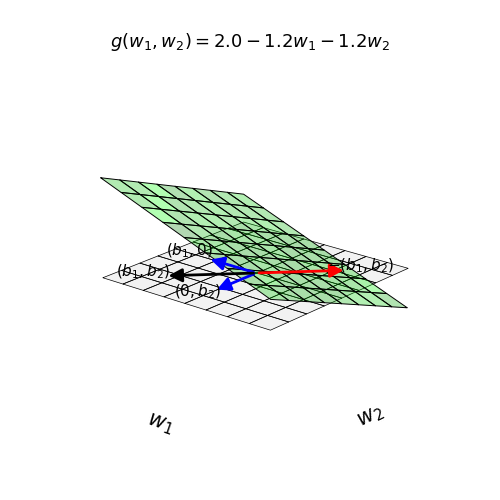
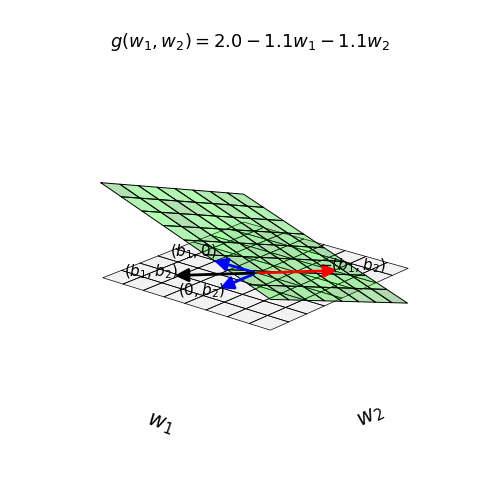
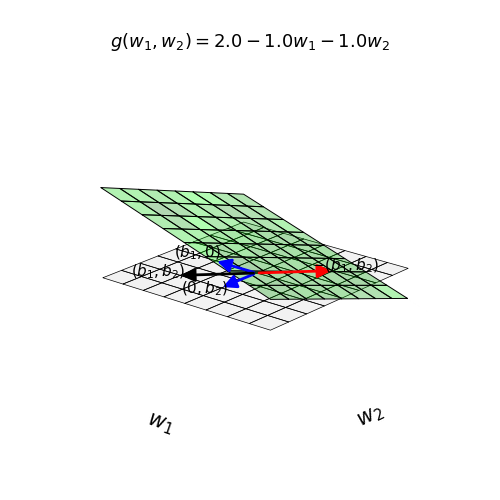
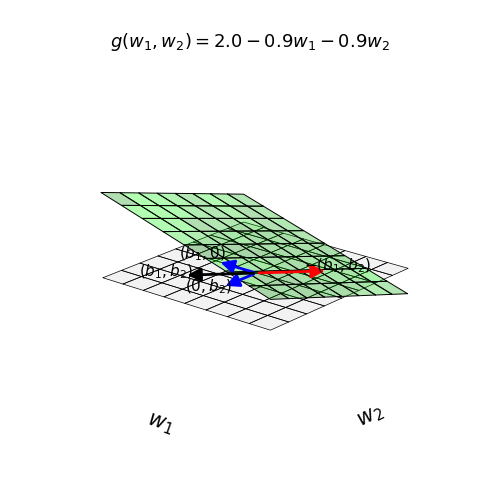
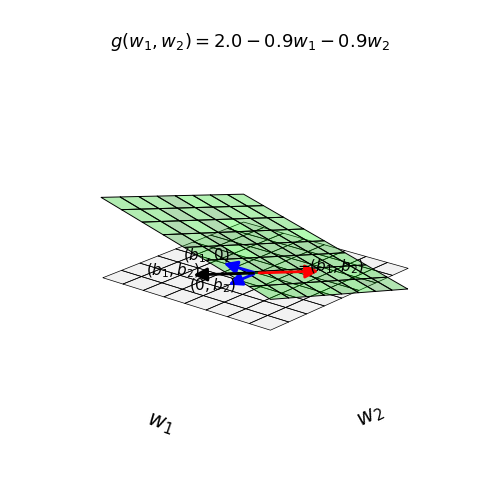
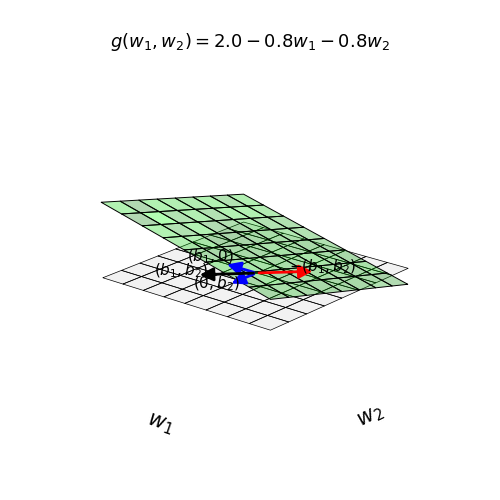
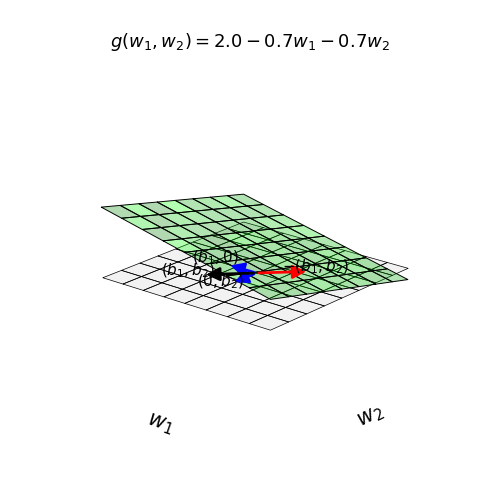
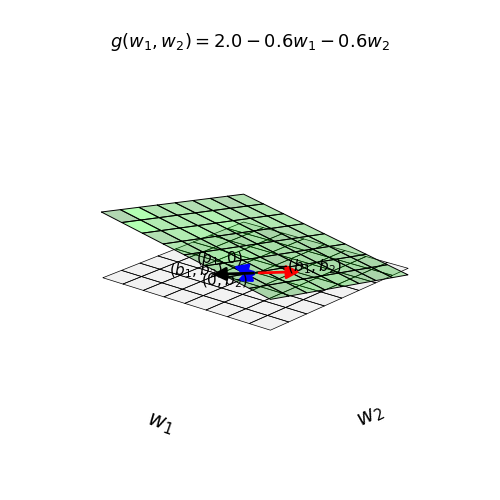
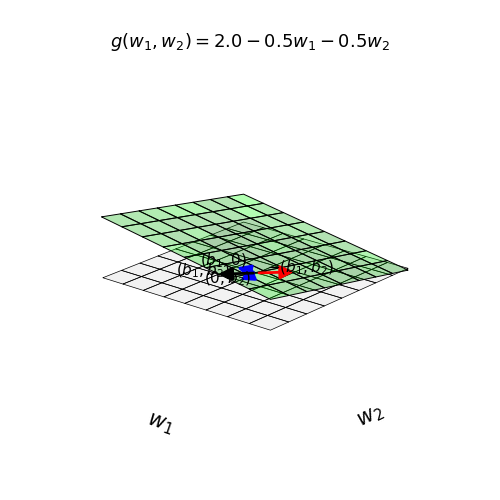
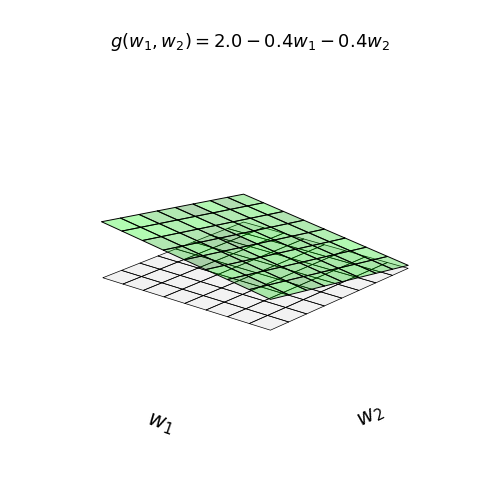
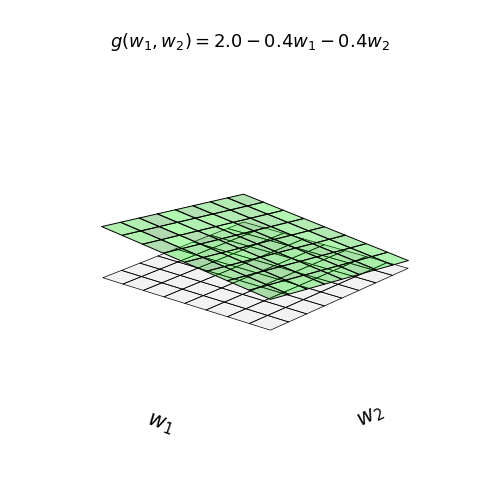
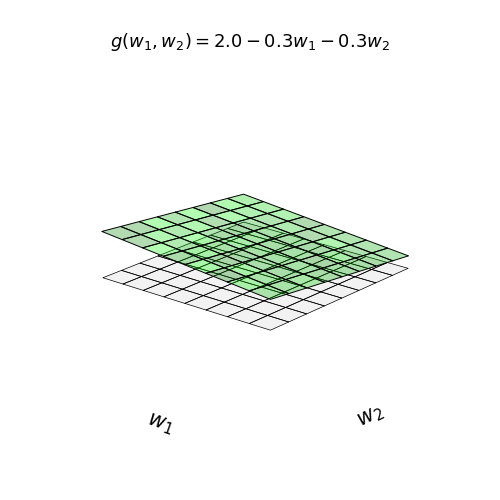
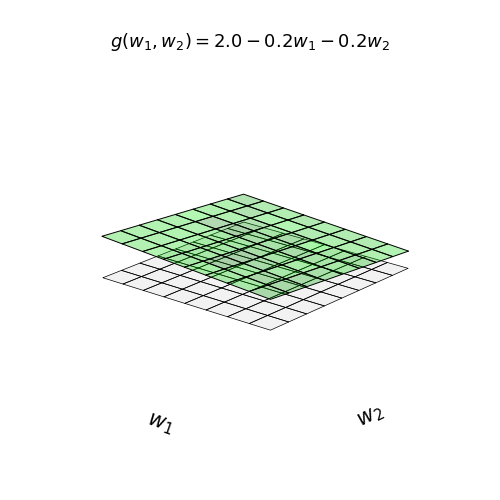
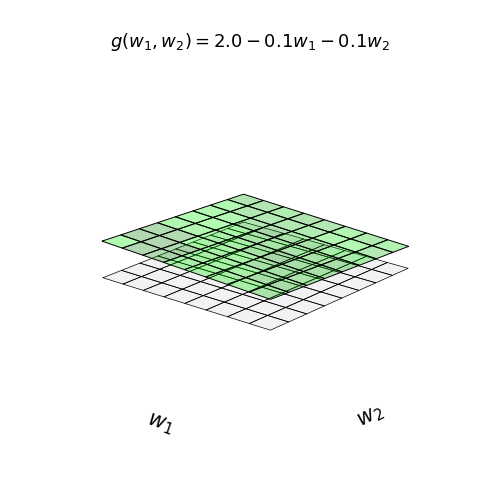
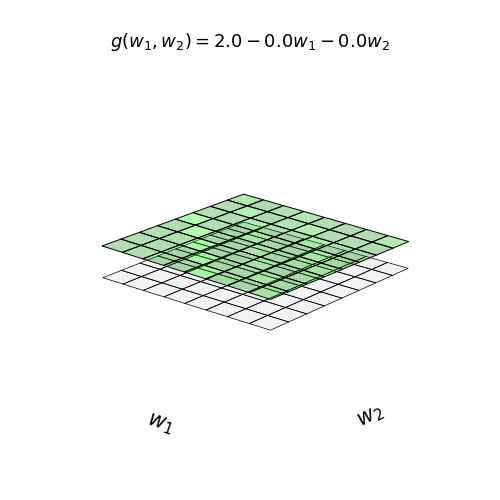
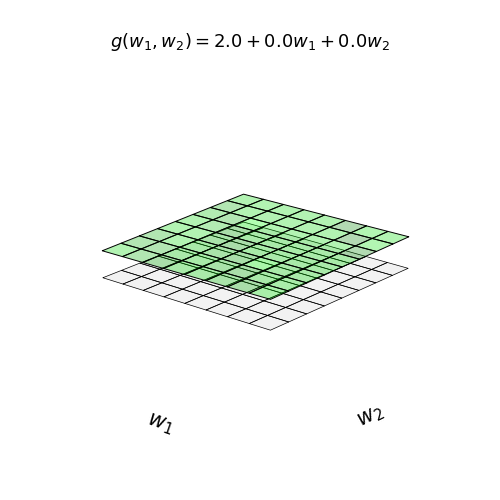
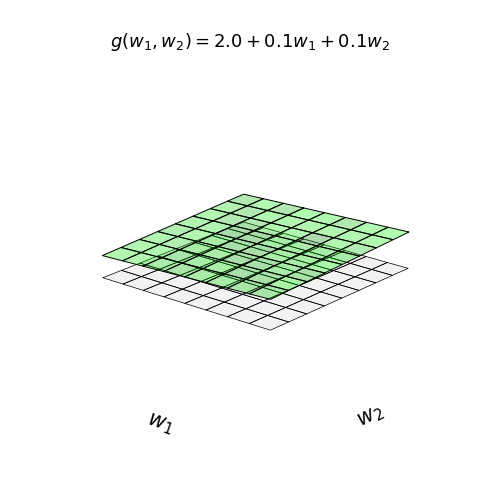
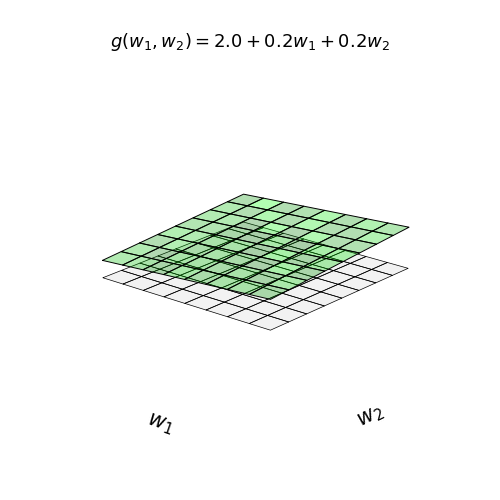
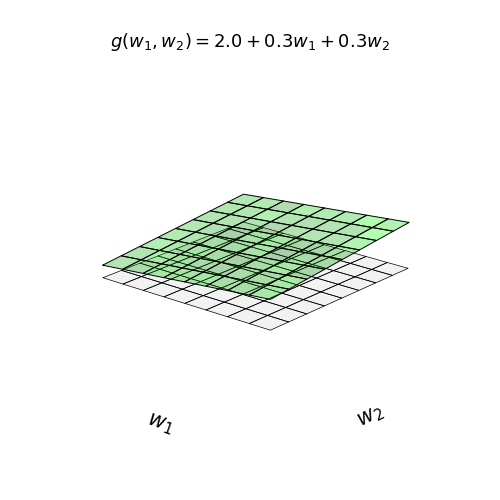
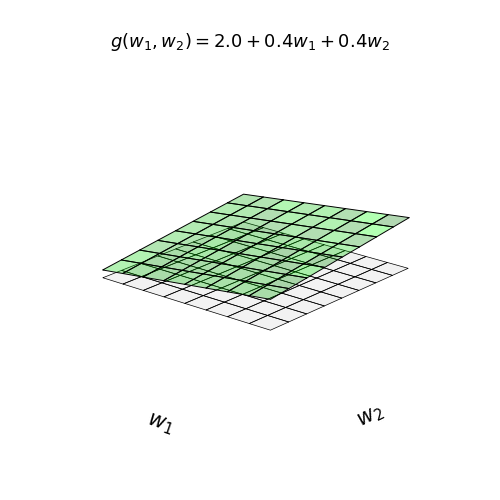
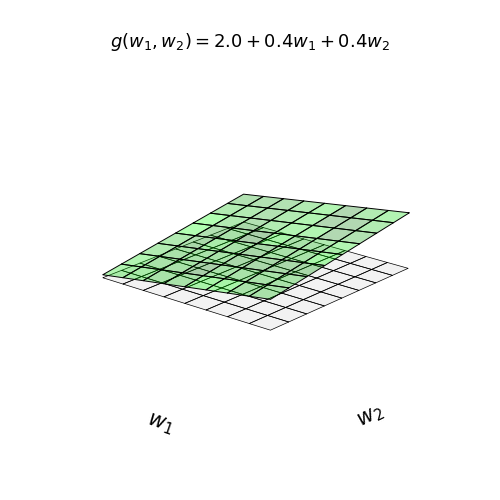
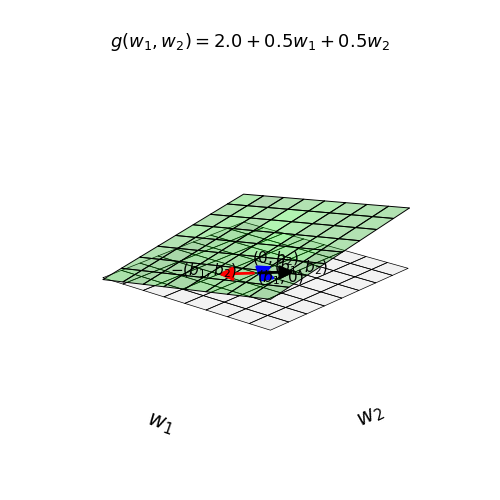
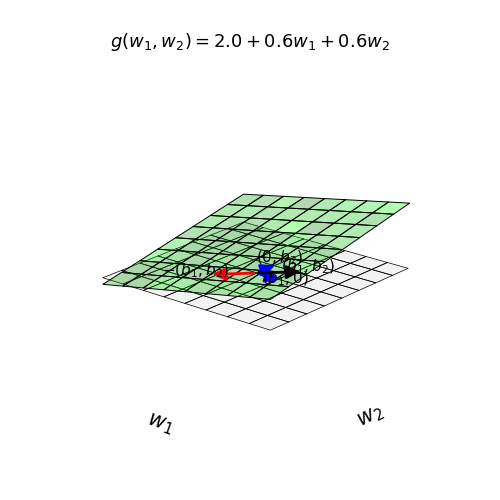
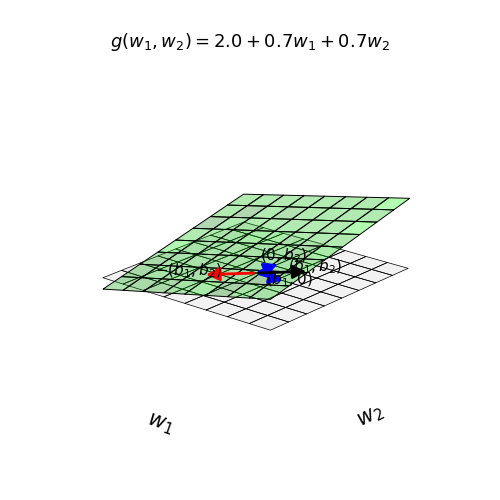
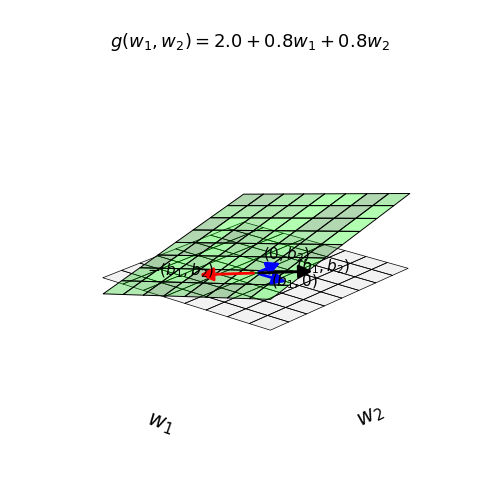
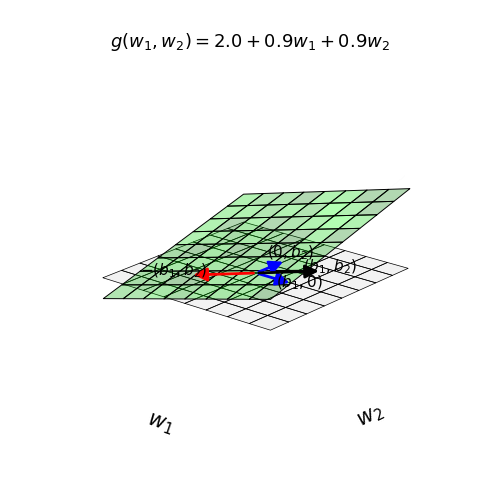
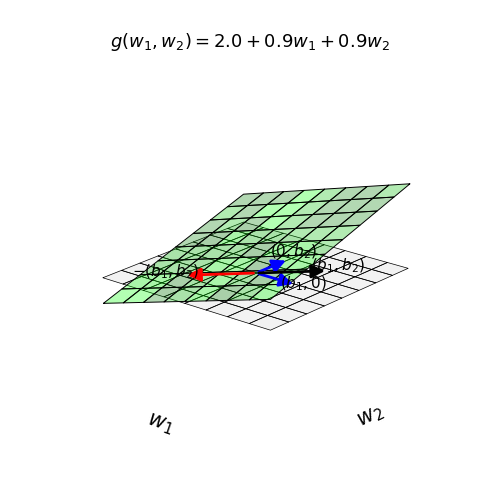
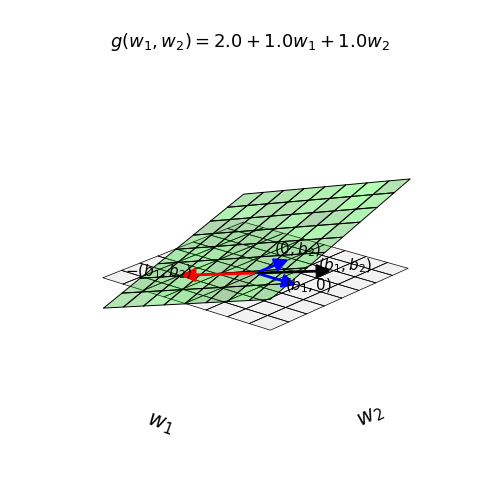
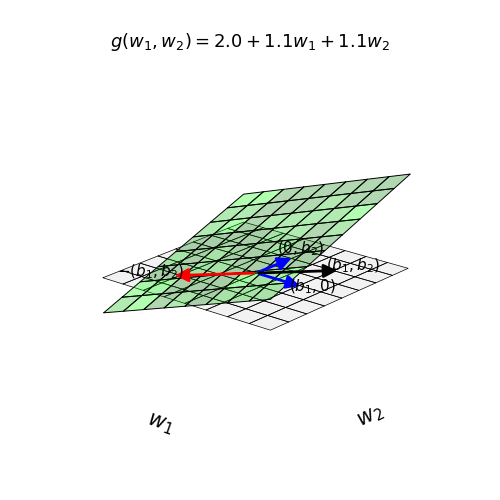
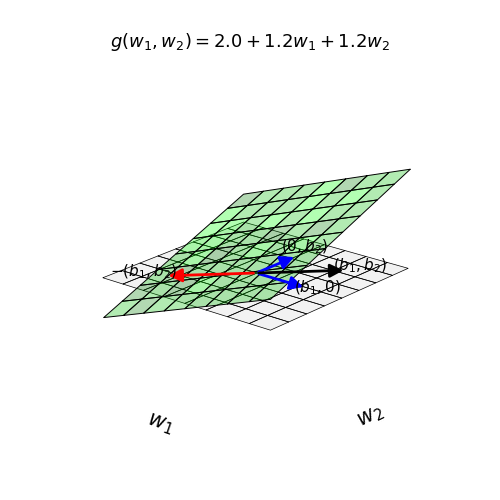
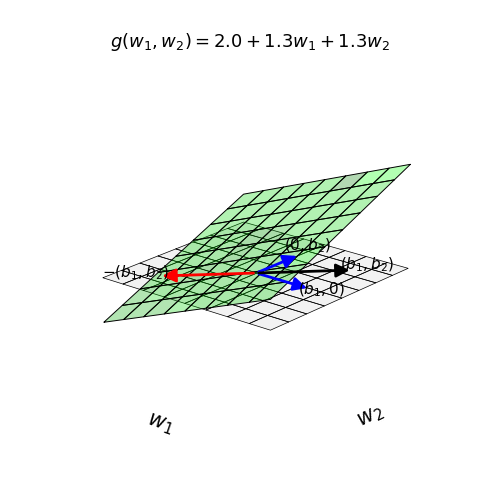
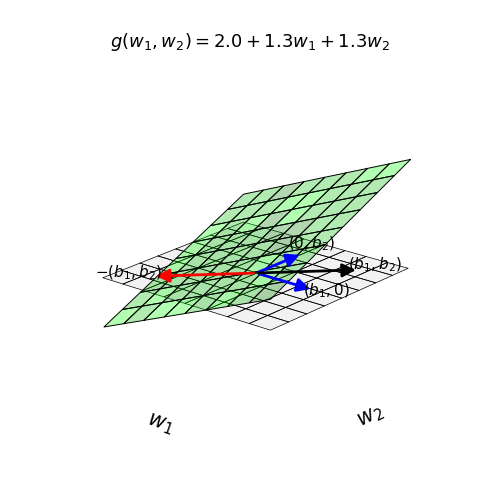
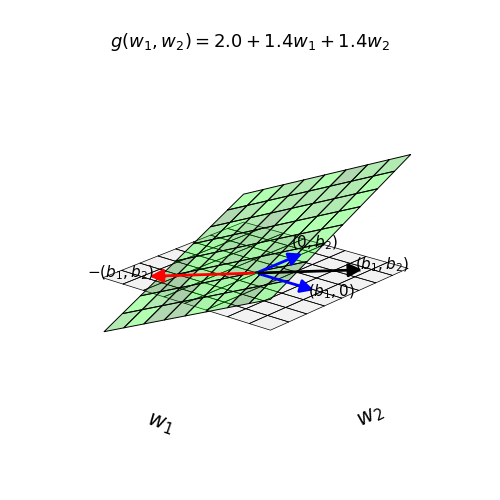
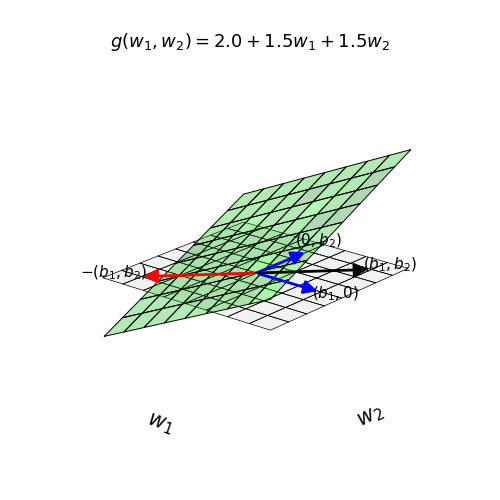
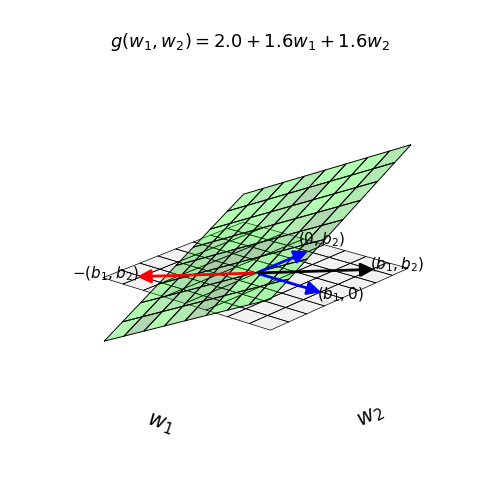
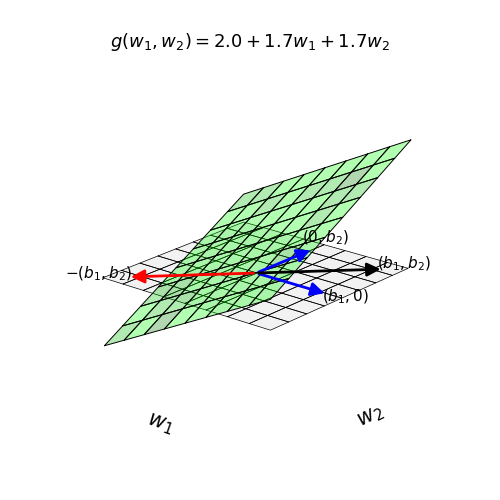
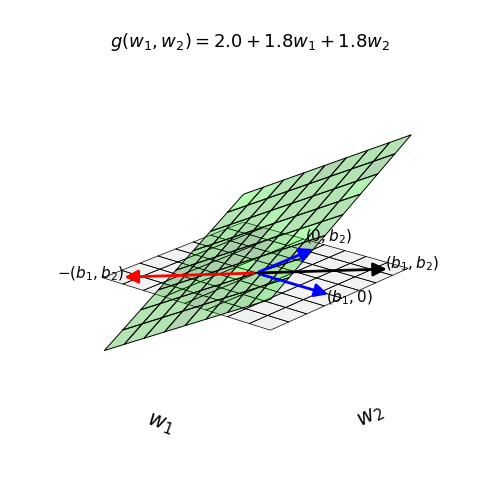
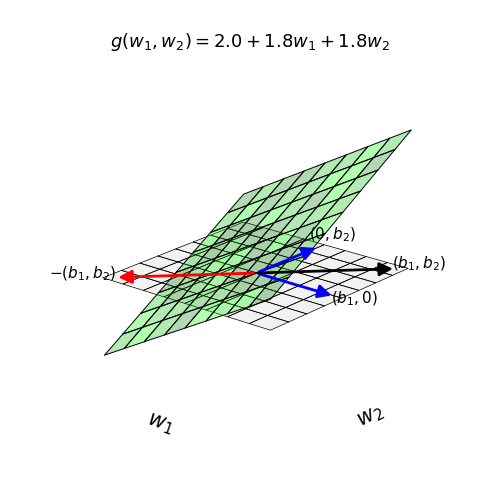
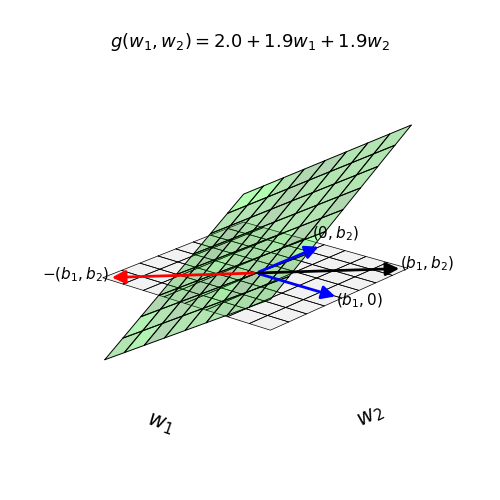
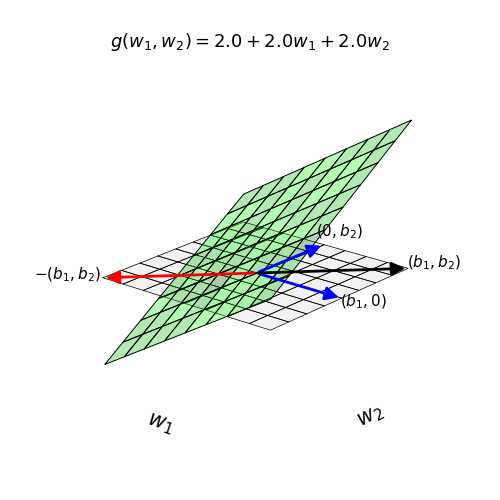

In [7]:
# define hyperplane
func = lambda w:  2 -2*w[0] - 2*w[1] 

# animate 2d slope visualizer
callib.slope_visualizer.animate_visualize3d(func=func,num_frames=50)

---

The simple method detailed above for constructing multi-input hyperplanes can be used to produce every possible multi-input hyperplane in two dimensions.  

The analagouos procedure can also generate every possible hyperplane in higher dimensions as well.

More generally for $N$ dimensional input we can define a single input hyperplane along each dimension

\begin{array}
\
g_1(\mathbf{w}) = a_1 + b_1 w_1  \\
g_2(\mathbf{w}) = a_2 + b_2w_2   \\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots \\
g_N(\mathbf{w}) = a_N + b_N w_N \\
\end{array}

and summing them up as $g(\mathbf{w}) = \sum_{n=1}^N g_n(\mathbf{w})$ gives - collecting terms

\begin{equation}
g(\mathbf{w}) = (a_1 + a_2  + \cdots a_N)  +  (b_1 w_1 + b_2 w_2 + \cdots b_N w_N) 
\end{equation}

We can write this formula more compactly using vector notation.   Deonting the constant as

\begin{equation}
a = \sum_{n=1}^{N} a_n
\end{equation}

and the $\mathbf{b}$ the $N\times 1$ vector

\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_N
\end{bmatrix}
\end{equation}

we have our hyperplane written as 

\begin{equation}
g(\mathbf{w}) = a + \mathbf{w}^T\mathbf{b}
\end{equation}

Such an $N$ dimensional hyperplane has a direction of steepest ascent given by $\mathbf{b}$.  By the same logic, the vector $-\mathbf{b}$ gives the direction of steepest *descent*, or the fastest way to move downward on the hyperplane.